In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 45)

In [3]:
ab_ptax = pd.read_excel('data/AB_Ptax/2021_financial_year.xlsx', header=1,skiprows=[2], sheet_name='MR(1)-Residential')
ab_nrptax = pd.read_excel('data/AB_Ptax/2021_financial_year.xlsx', header=1, skiprows=[2], sheet_name='MR(2)-Non-Residential')

In [4]:
ab_nrptax.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Does your municipality have a Small Business Tax Bylaw?,"If yes, what is the Small Business Tax rate (expressed in mills) ?",Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land)
0,2021.0,City,3.0,AIRDRIE,10.17585,3.53893,0.0000,0.0,No,0.0,0.05428,No,0.0,2.100023
1,2021.0,City,19.0,BEAUMONT,9.94854,3.75881,0.0262,77900.0,No,0.0,0.02613,No,0.0,1.390000


In [5]:
ab_ptax.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,General Municipal Tax Rate (Farmland),Education - Alberta School Foundation Fund Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does your municipality have more than one residential tax rate?
0,2021.0,City,3.0,AIRDRIE,4.84559,4.84559,2.59814,0.0000,0.0,0.05428,No,0.0,2.100023,Yes
1,2021.0,City,19.0,BEAUMONT,7.14303,7.14303,2.57981,0.0262,77900.0,0.02613,No,0.0,1.390000,Yes


In [6]:
ab_ptax.shape, ab_nrptax.shape

((336, 14), (336, 14))

In [7]:
ab_nrptax.rename(columns={'General Municipal Tax Rate':'NonResidential',  'Education - Alberta School Foundation Fund Tax Rate':'NonResidential Education'}, inplace=True)
ab_nrptax.iloc[:, 4:6] = ab_nrptax.iloc[:, 4:6] * 0.001

In [8]:
ab_ptax.rename(columns={'General Municipal Tax Rate':'Residential','General Municipal Tax Rate (Farmland)': 'Farm','Education - Alberta School Foundation Fund Tax Rate': 'Education'}, inplace=True)
ab_ptax.iloc[:, 4:7] = ab_ptax.iloc[:,4:7] * 0.001

In [9]:
ab_ptax = pd.concat([ab_ptax, ab_nrptax[['NonResidential', 'NonResidential Education']]], axis=1)
ab_ptax['ResidentialTotalTax'] = ab_ptax['Residential'] + ab_ptax['Education']
ab_ptax['NonResidentialTotalTax'] = ab_ptax['NonResidential'] + ab_ptax['NonResidential Education']
ab_ptax['FarmTotalTax'] = ab_ptax['Farm'] + ab_ptax['Education']

In [10]:
ab_ptax['TaxRatio NonRes/Res'] = ab_ptax['NonResidential']/ab_ptax['Residential']
ab_ptax['TaxRatio Farm/Residential'] = ab_ptax['Farm']/ab_ptax['Residential']

In [11]:
#Test
ab_ptax.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,Residential,Farm,Education,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does your municipality have more than one residential tax rate?,NonResidential,NonResidential Education,ResidentialTotalTax,NonResidentialTotalTax,FarmTotalTax,TaxRatio NonRes/Res,TaxRatio Farm/Residential
0,2021.0,City,3.0,AIRDRIE,0.004846,0.004846,0.002598,0.0000,0.0,0.05428,No,0.0,2.100023,Yes,0.010176,0.003539,0.007444,0.013715,0.007444,2.100023,1.0
1,2021.0,City,19.0,BEAUMONT,0.007143,0.007143,0.002580,0.0262,77900.0,0.02613,No,0.0,1.390000,Yes,0.009949,0.003759,0.009723,0.013707,0.009723,1.392762,1.0


In [12]:
edmonton_metro = ['EDMONTON', 'LEDUC', 'BEAUMONT', 'DEVON', 'SPRUCE GROVE', 'STONEY PLAIN', 'ST. ALBERT', 'MORNVILLE', 'FORT SASKATCHEWAN', 'LEDUC COUNTY', 'PARKLAND COUNTY', 'STURGEON COUNTY', 'STRATHCONA COUNTY']

In [13]:
edmonton_df = ab_ptax[ab_ptax['MUNICIPALITY'].isin(edmonton_metro)].copy()
edmonton_df = edmonton_df[['YEAR', 'MUNICIPALITY', 'Residential', 'Education','Farm','NonResidential', 'NonResidential Education', 'ResidentialTotalTax', 'FarmTotalTax', 'NonResidentialTotalTax', 'TaxRatio NonRes/Res', 'TaxRatio Farm/Residential']]

In [14]:
calgary_metro = ['CALGARY','OKOTOKS','HIGH RIVER', 'COCHRANE', 'AIRDRIE', 'STRATHMORE', 'CHESTERMERE', 'FOOTHILLS COUNTY','ROCKVIEW COUNTY', 'WHEATLAND COUNTY']

In [15]:
calgary_df = ab_ptax[ab_ptax['MUNICIPALITY'].isin(calgary_metro)].copy()
calgary_df = calgary_df[['YEAR', 'MUNICIPALITY', 'Residential', 'Education','Farm','NonResidential', 'NonResidential Education', 'ResidentialTotalTax', 'FarmTotalTax', 'NonResidentialTotalTax', 'TaxRatio NonRes/Res', 'TaxRatio Farm/Residential']]

In [49]:
edmonton_df

,YEAR,MUNICIPALITY,Residential,Education,Farm,NonResidential,NonResidential Education,ResidentialTotalTax,FarmTotalTax,NonResidentialTotalTax,TaxRatio NonRes/Res,TaxRatio Farm/Residential
1,2021.0,BEAUMONT,0.007143,0.002580,0.007143,0.009949,0.003759,0.009723,0.009723,0.013707,1.392762,1.000000
7,2021.0,EDMONTON,0.007011,0.002493,0.007011,0.019979,0.004100,0.009504,0.009504,0.024079,2.849734,1.000000
8,2021.0,FORT SASKATCHEWAN,0.005751,0.002631,0.005751,0.009922,0.004055,0.008382,0.008382,0.013977,1.725311,1.000000
11,2021.0,LEDUC,0.007594,0.002616,0.008541,0.008541,0.004085,0.010210,0.011157,0.012626,1.124704,1.124704
16,2021.0,SPRUCE GROVE,0.006725,0.002673,0.006725,0.009449,0.003877,0.009398,0.009398,0.013326,1.404990,1.000000
17,2021.0,ST. ALBERT,0.008521,0.002566,0.008521,0.011558,0.003865,0.011087,0.011087,0.015423,1.356449,1.000000
23,2021.0,STRATHCONA COUNTY,0.004642,0.002633,0.004642,0.009649,0.003935,0.007275,0.007275,0.013584,2.078582,1.000000
49,2021.0,LEDUC COUNTY,0.002915,0.002575,0.012140,0.006370,0.003836,0.005490,0.014715,0.010206,2.185249,4.164666
59,2021.0,PARKLAND COUNTY,0.004223,0.002665,0.004223,0.008445,0.004054,0.006888,0.006888,0.012500,1.999929,1.000000
74,2021.0,STURGEON COUNTY,0.003645,0.002543,0.009470,0.010281,0.003589,0.006188,0.012013,0.013870,2.820599,2.598151


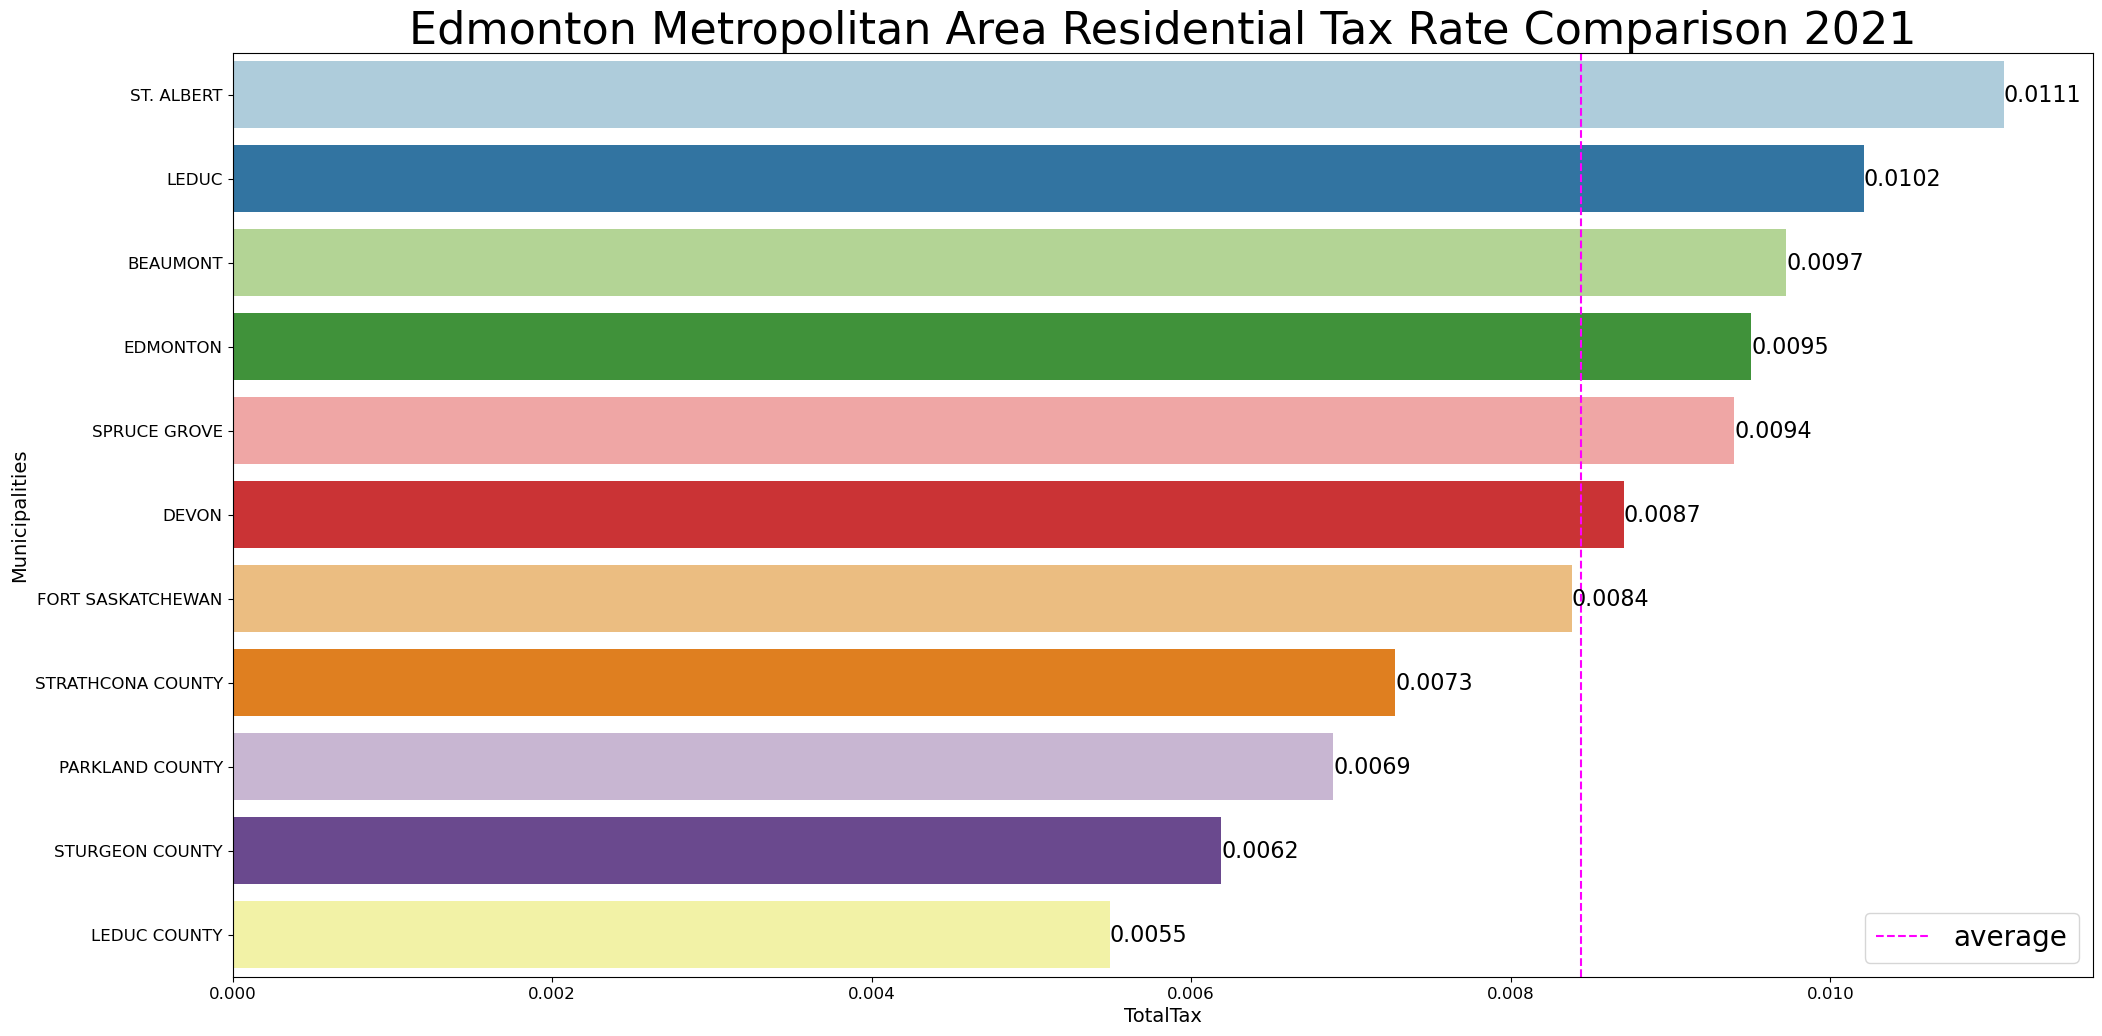

In [16]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='ResidentialTotalTax', ascending=False), y='MUNICIPALITY', x='ResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('TotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metropolitan Area Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['ResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

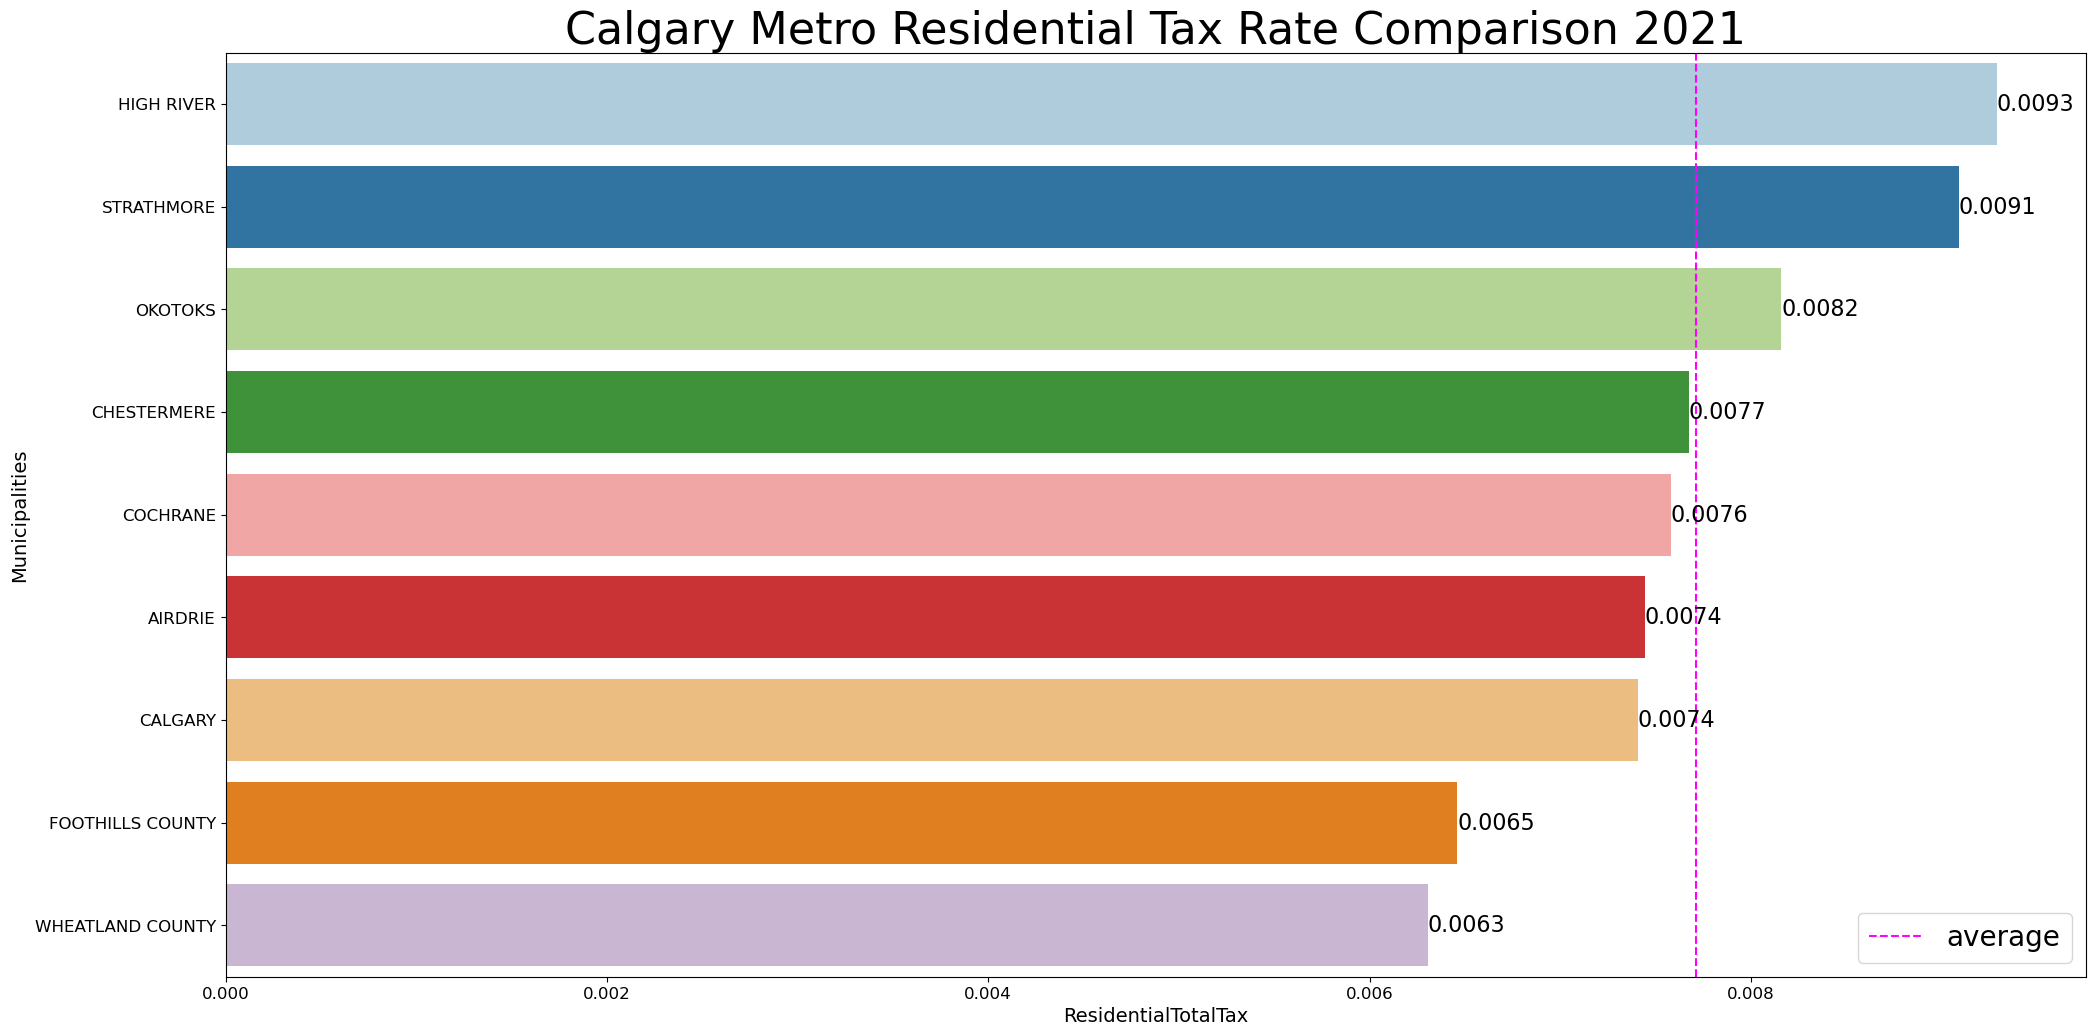

In [17]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=calgary_df.sort_values(by='ResidentialTotalTax', ascending=False), y='MUNICIPALITY', x='ResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('ResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['ResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

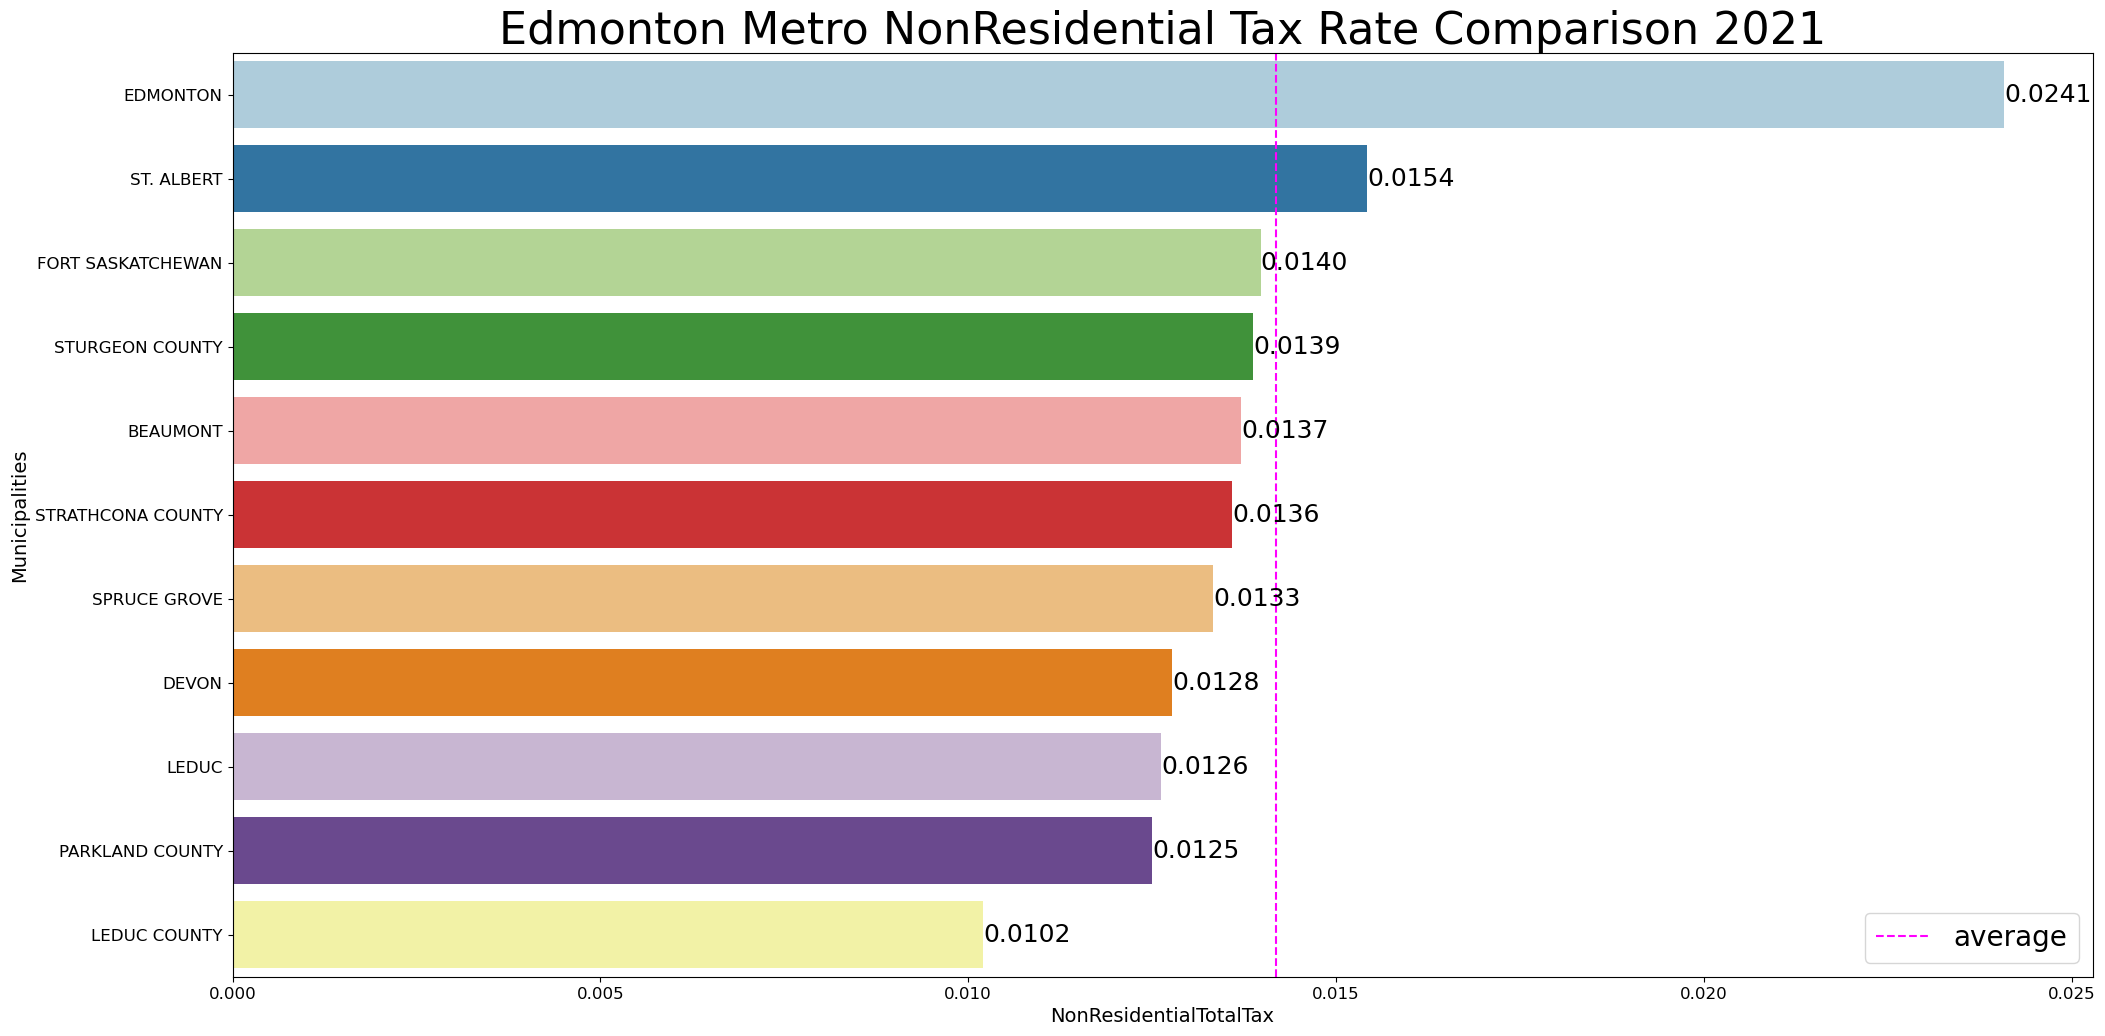

In [18]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='NonResidentialTotalTax', ascending=False), y='MUNICIPALITY', x='NonResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro NonResidential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=18)
plt.axvline(edmonton_df['NonResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

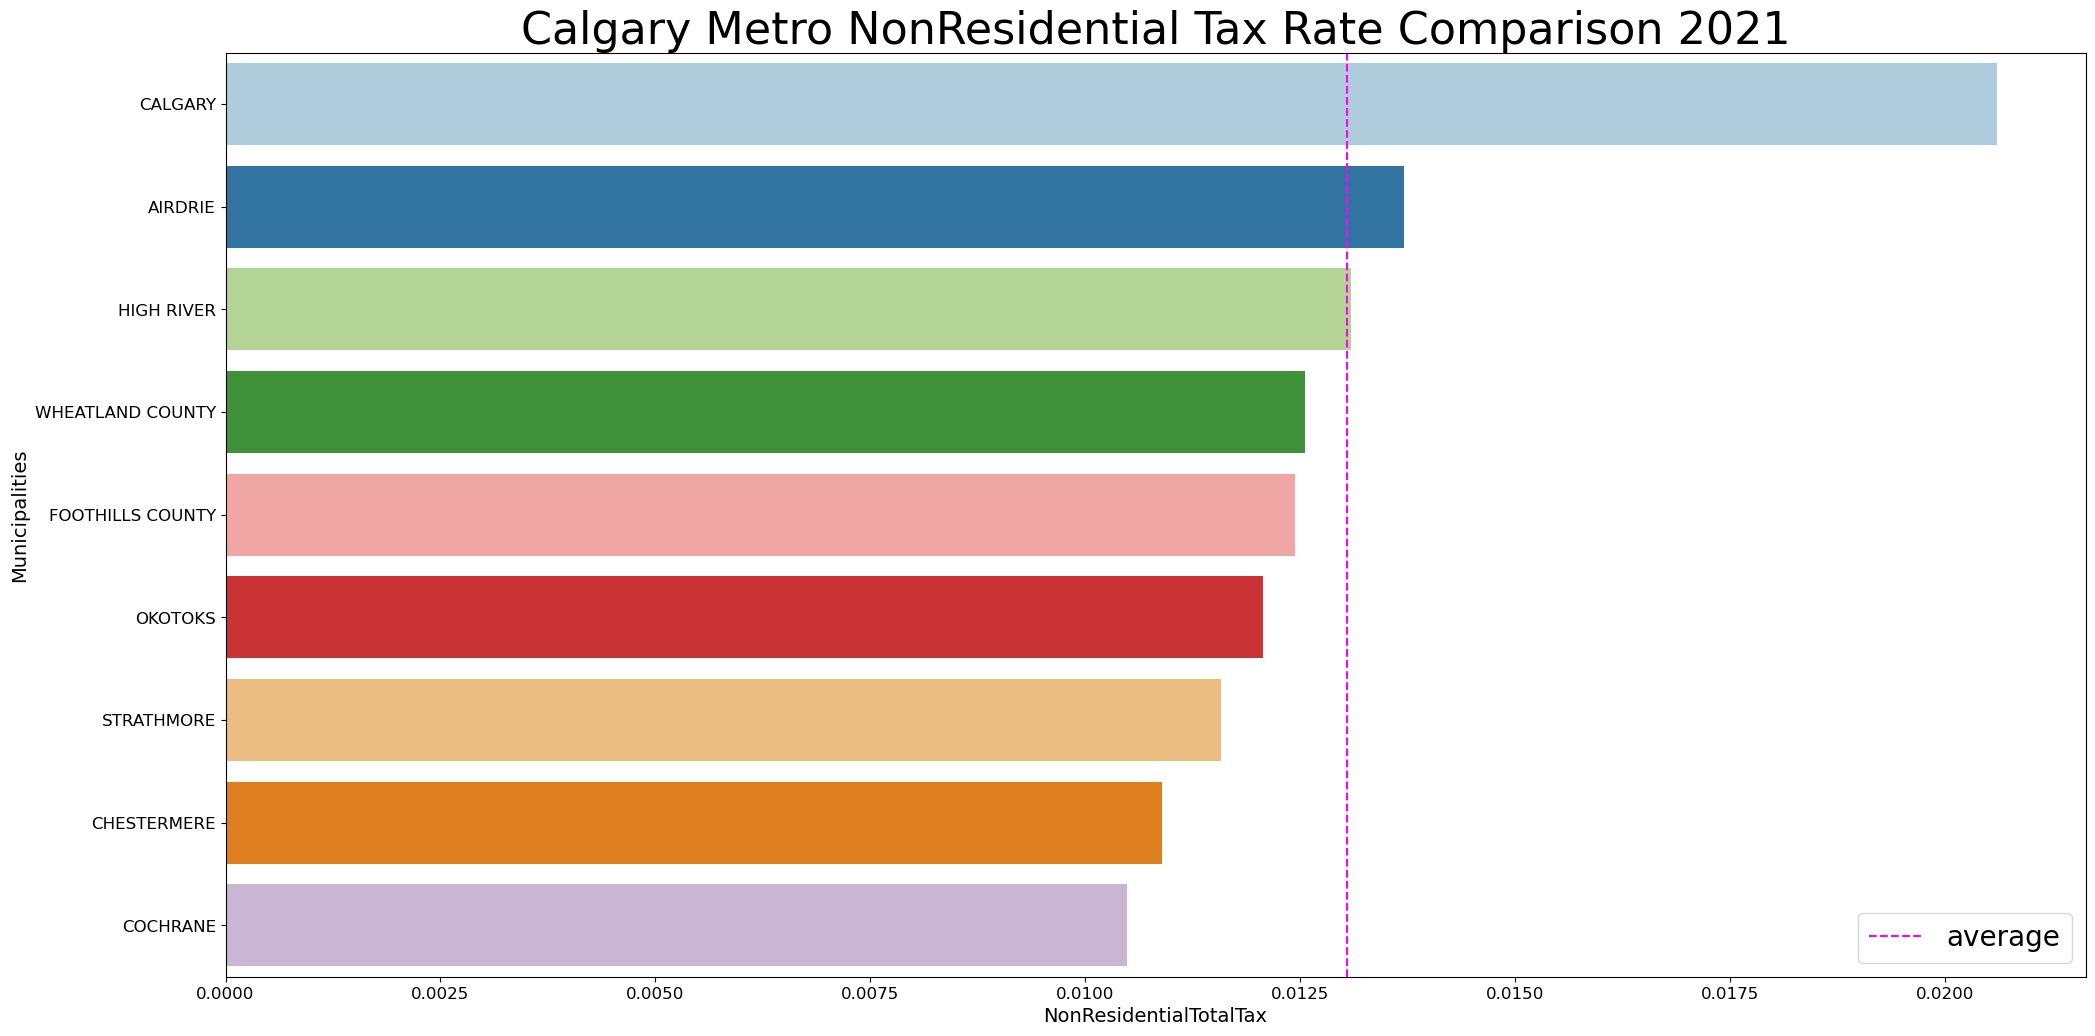

In [19]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=calgary_df.sort_values(by='NonResidentialTotalTax', ascending=False), y='MUNICIPALITY', x='NonResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro NonResidential Tax Rate Comparison 2021', fontsize=32)
plt.axvline(calgary_df['NonResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

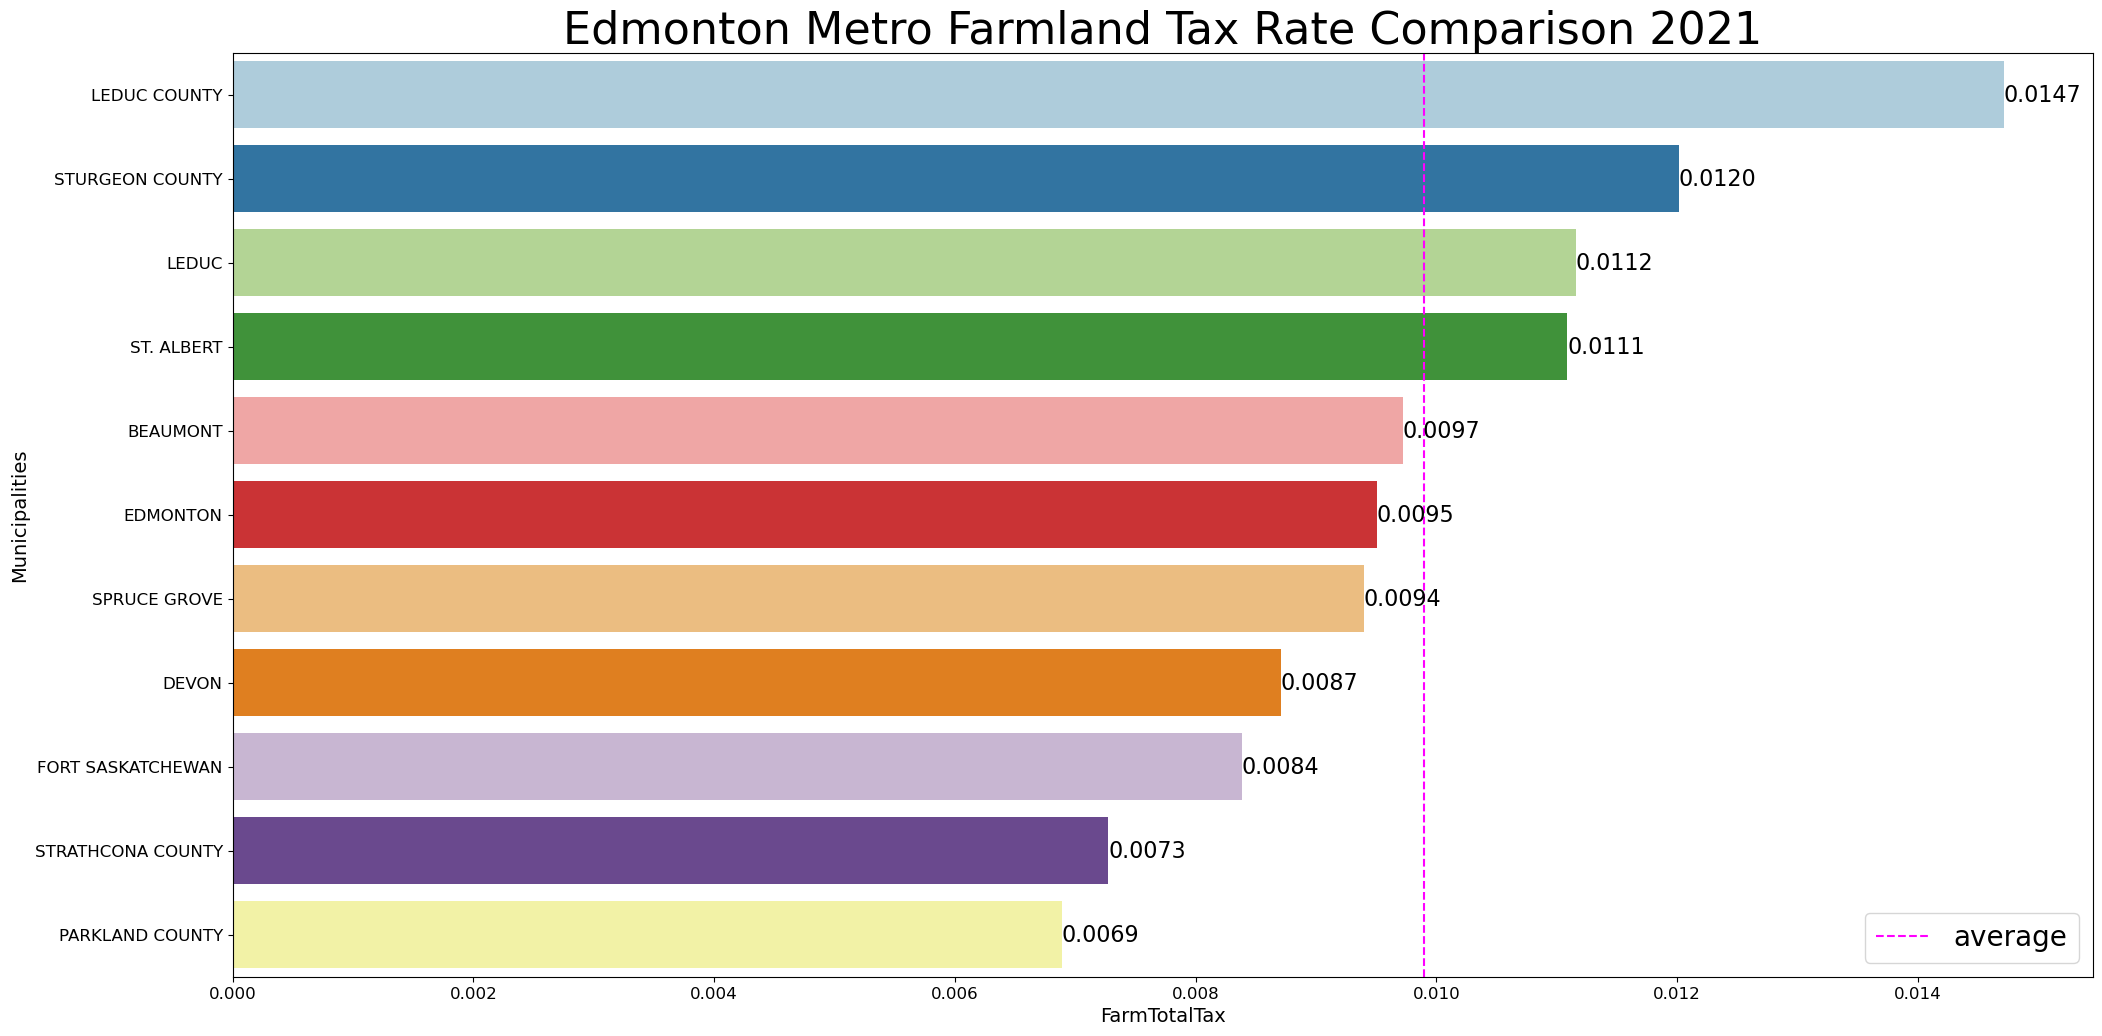

In [20]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='FarmTotalTax', ascending=False), y='MUNICIPALITY', x='FarmTotalTax', orient='h', palette='Paired')
ax.set_xlabel('FarmTotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['FarmTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

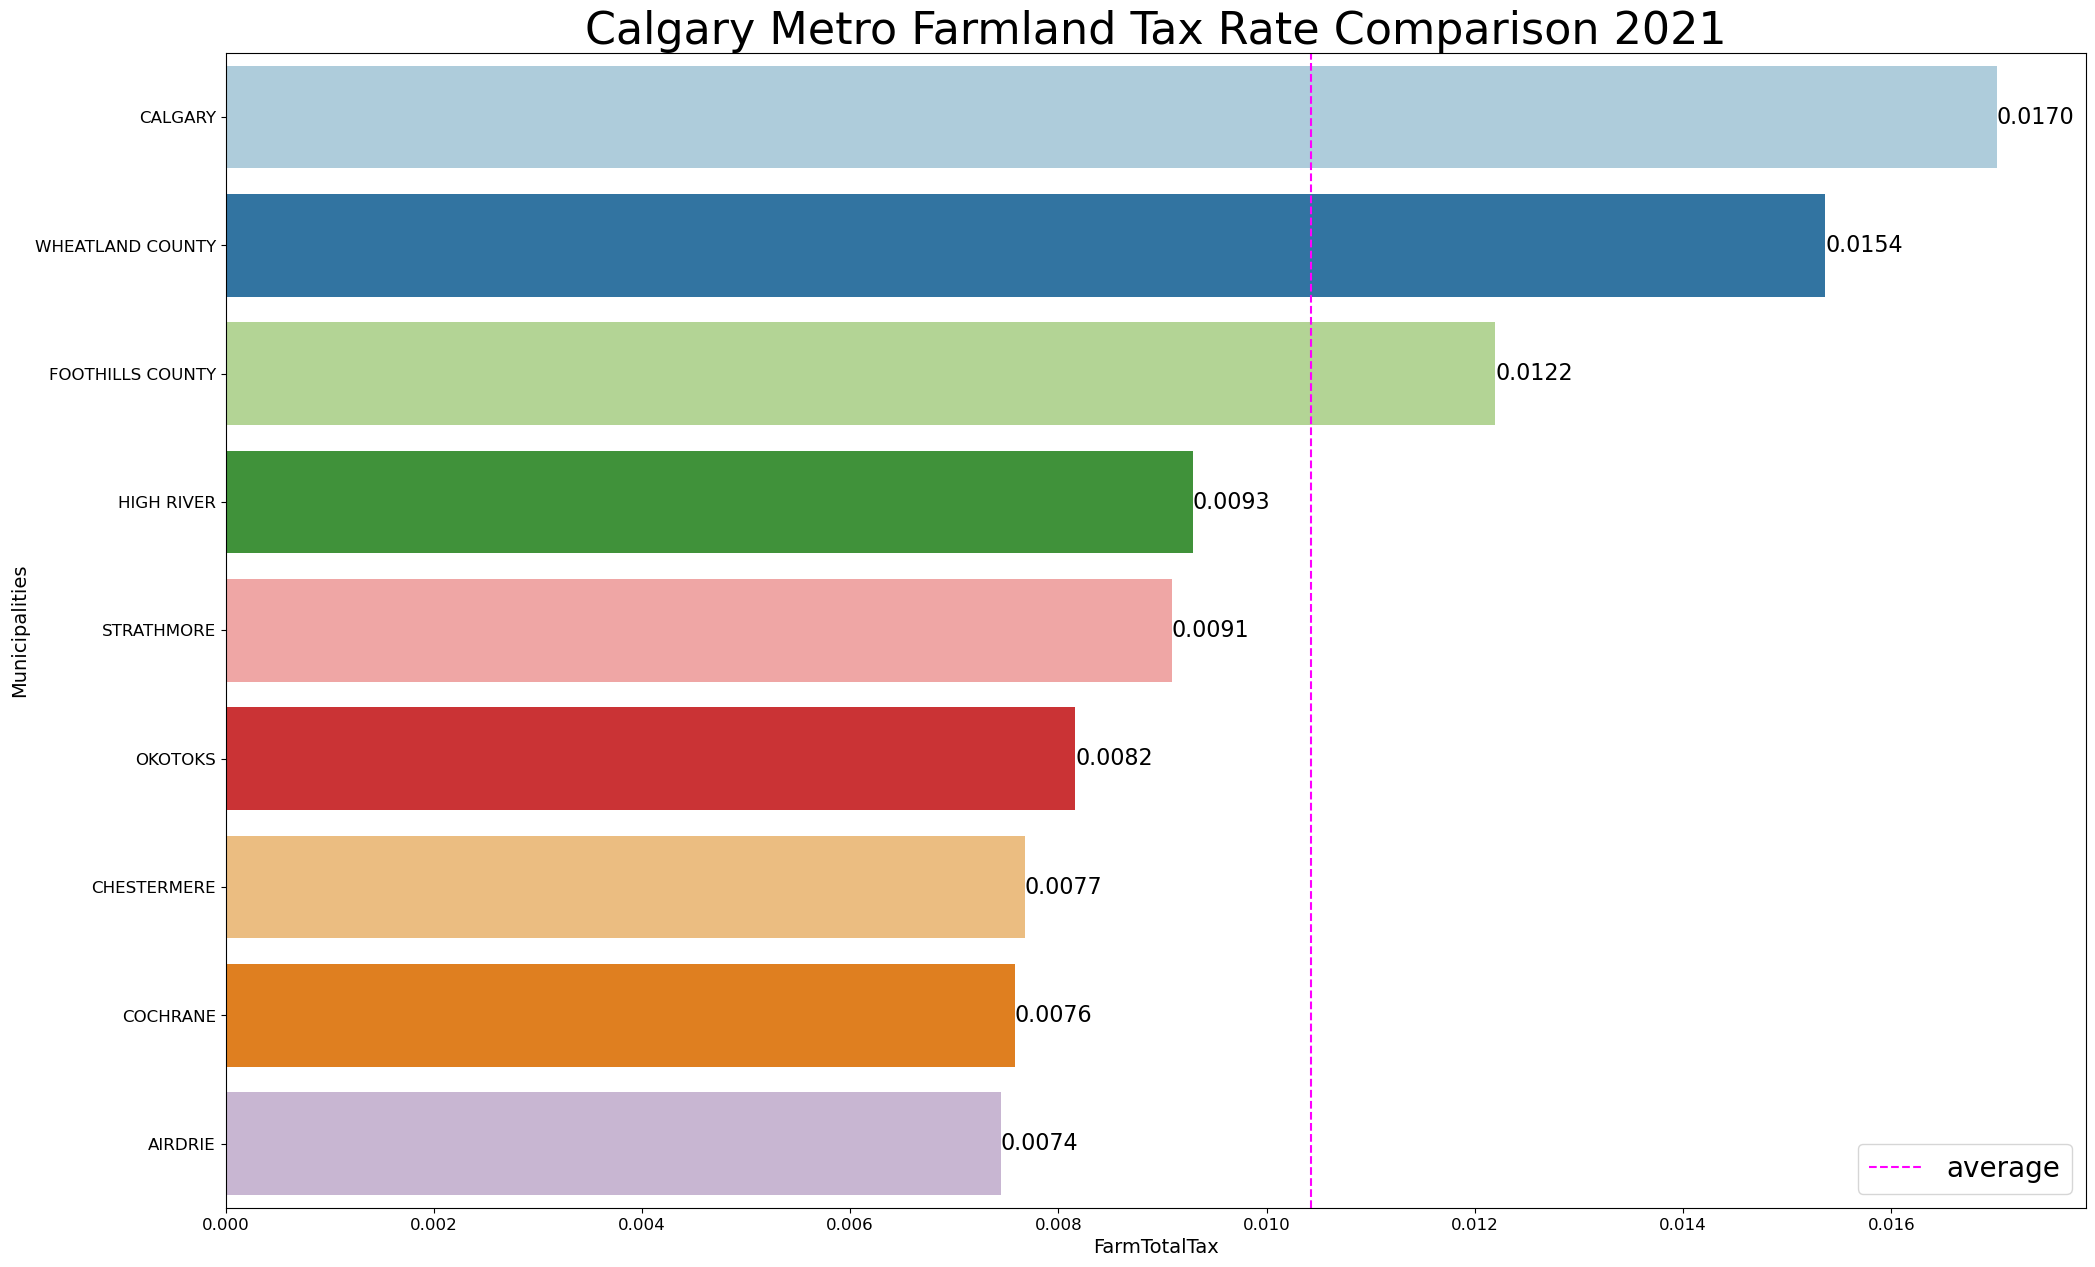

In [21]:
fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=calgary_df.sort_values(by='FarmTotalTax', ascending=False), y='MUNICIPALITY', x='FarmTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('FarmTotalTax', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['FarmTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

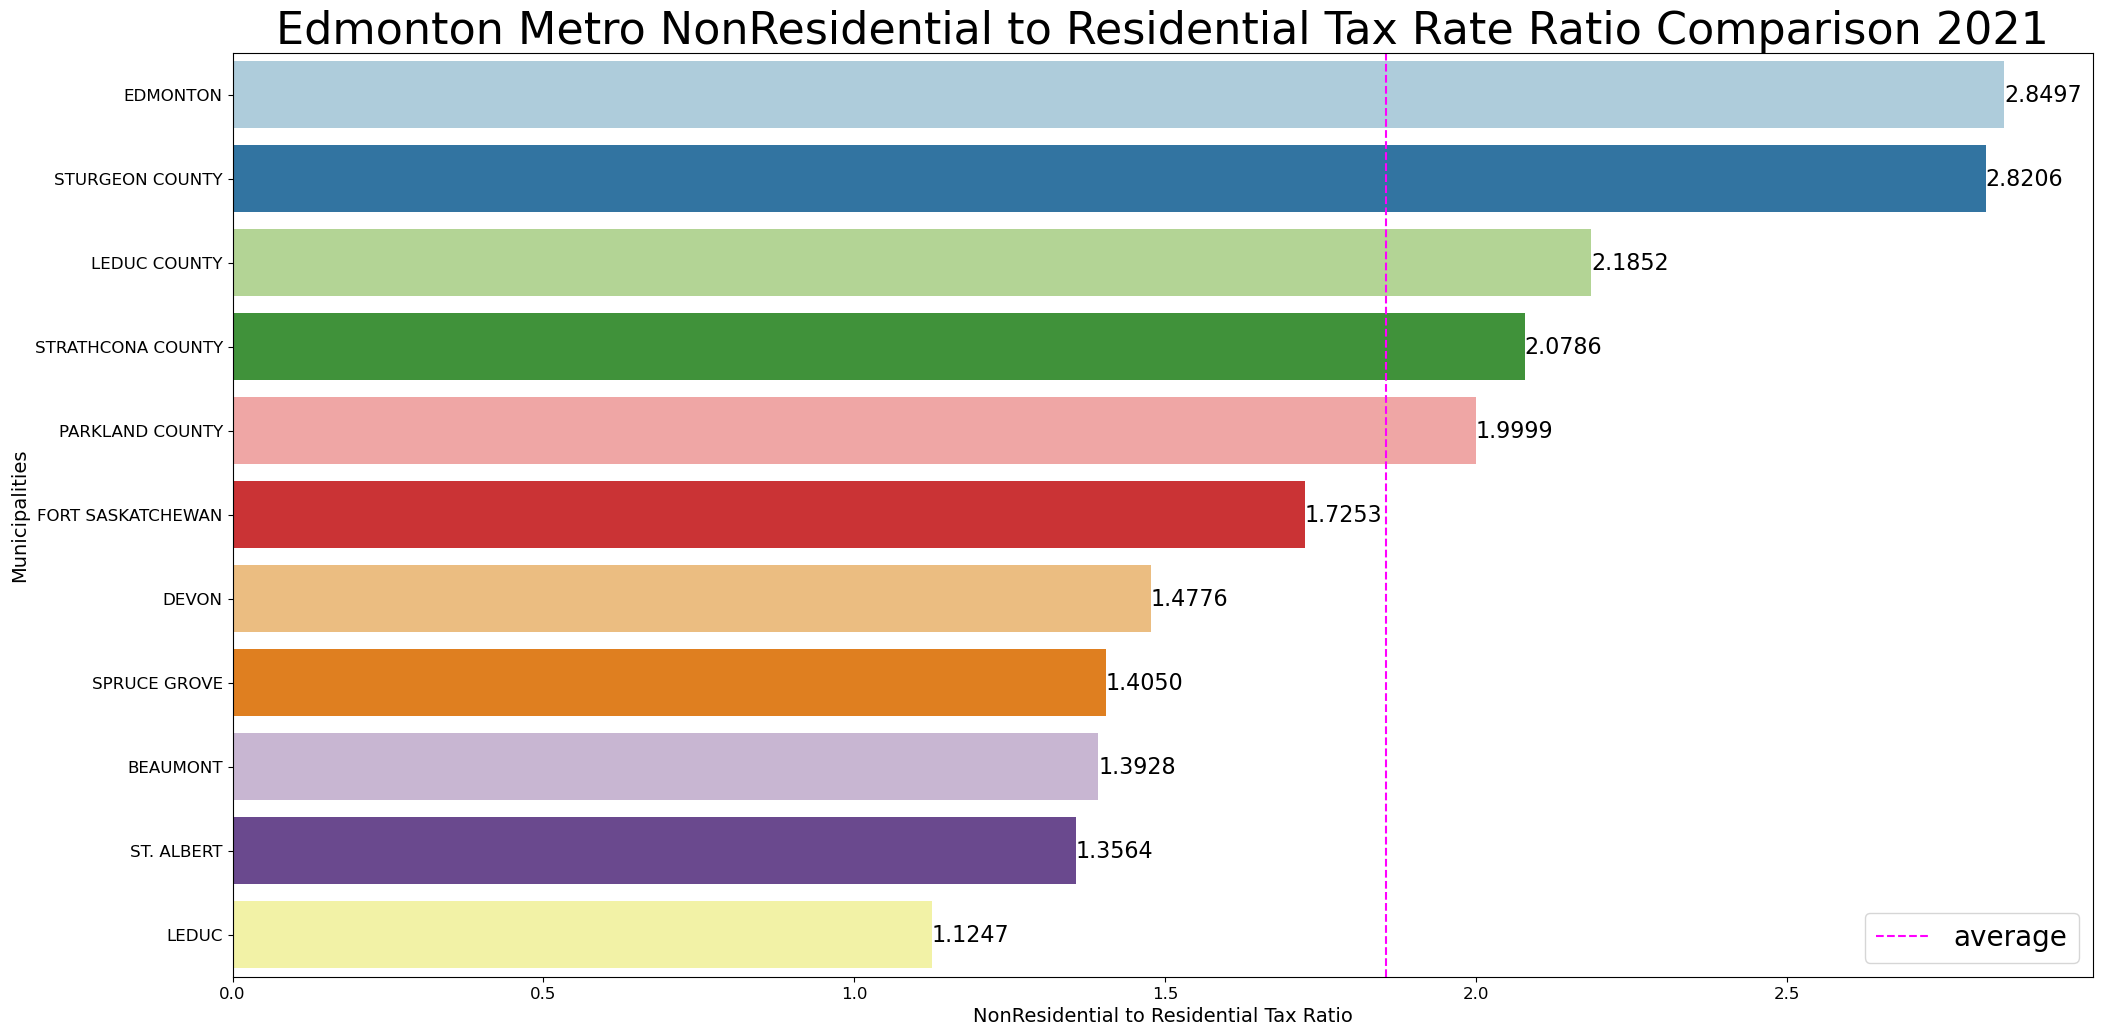

In [22]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='TaxRatio NonRes/Res', ascending=False), y='MUNICIPALITY', x='TaxRatio NonRes/Res', orient='h', palette='Paired')
ax.set_xlabel('NonResidential to Residential Tax Ratio', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro NonResidential to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['TaxRatio NonRes/Res'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

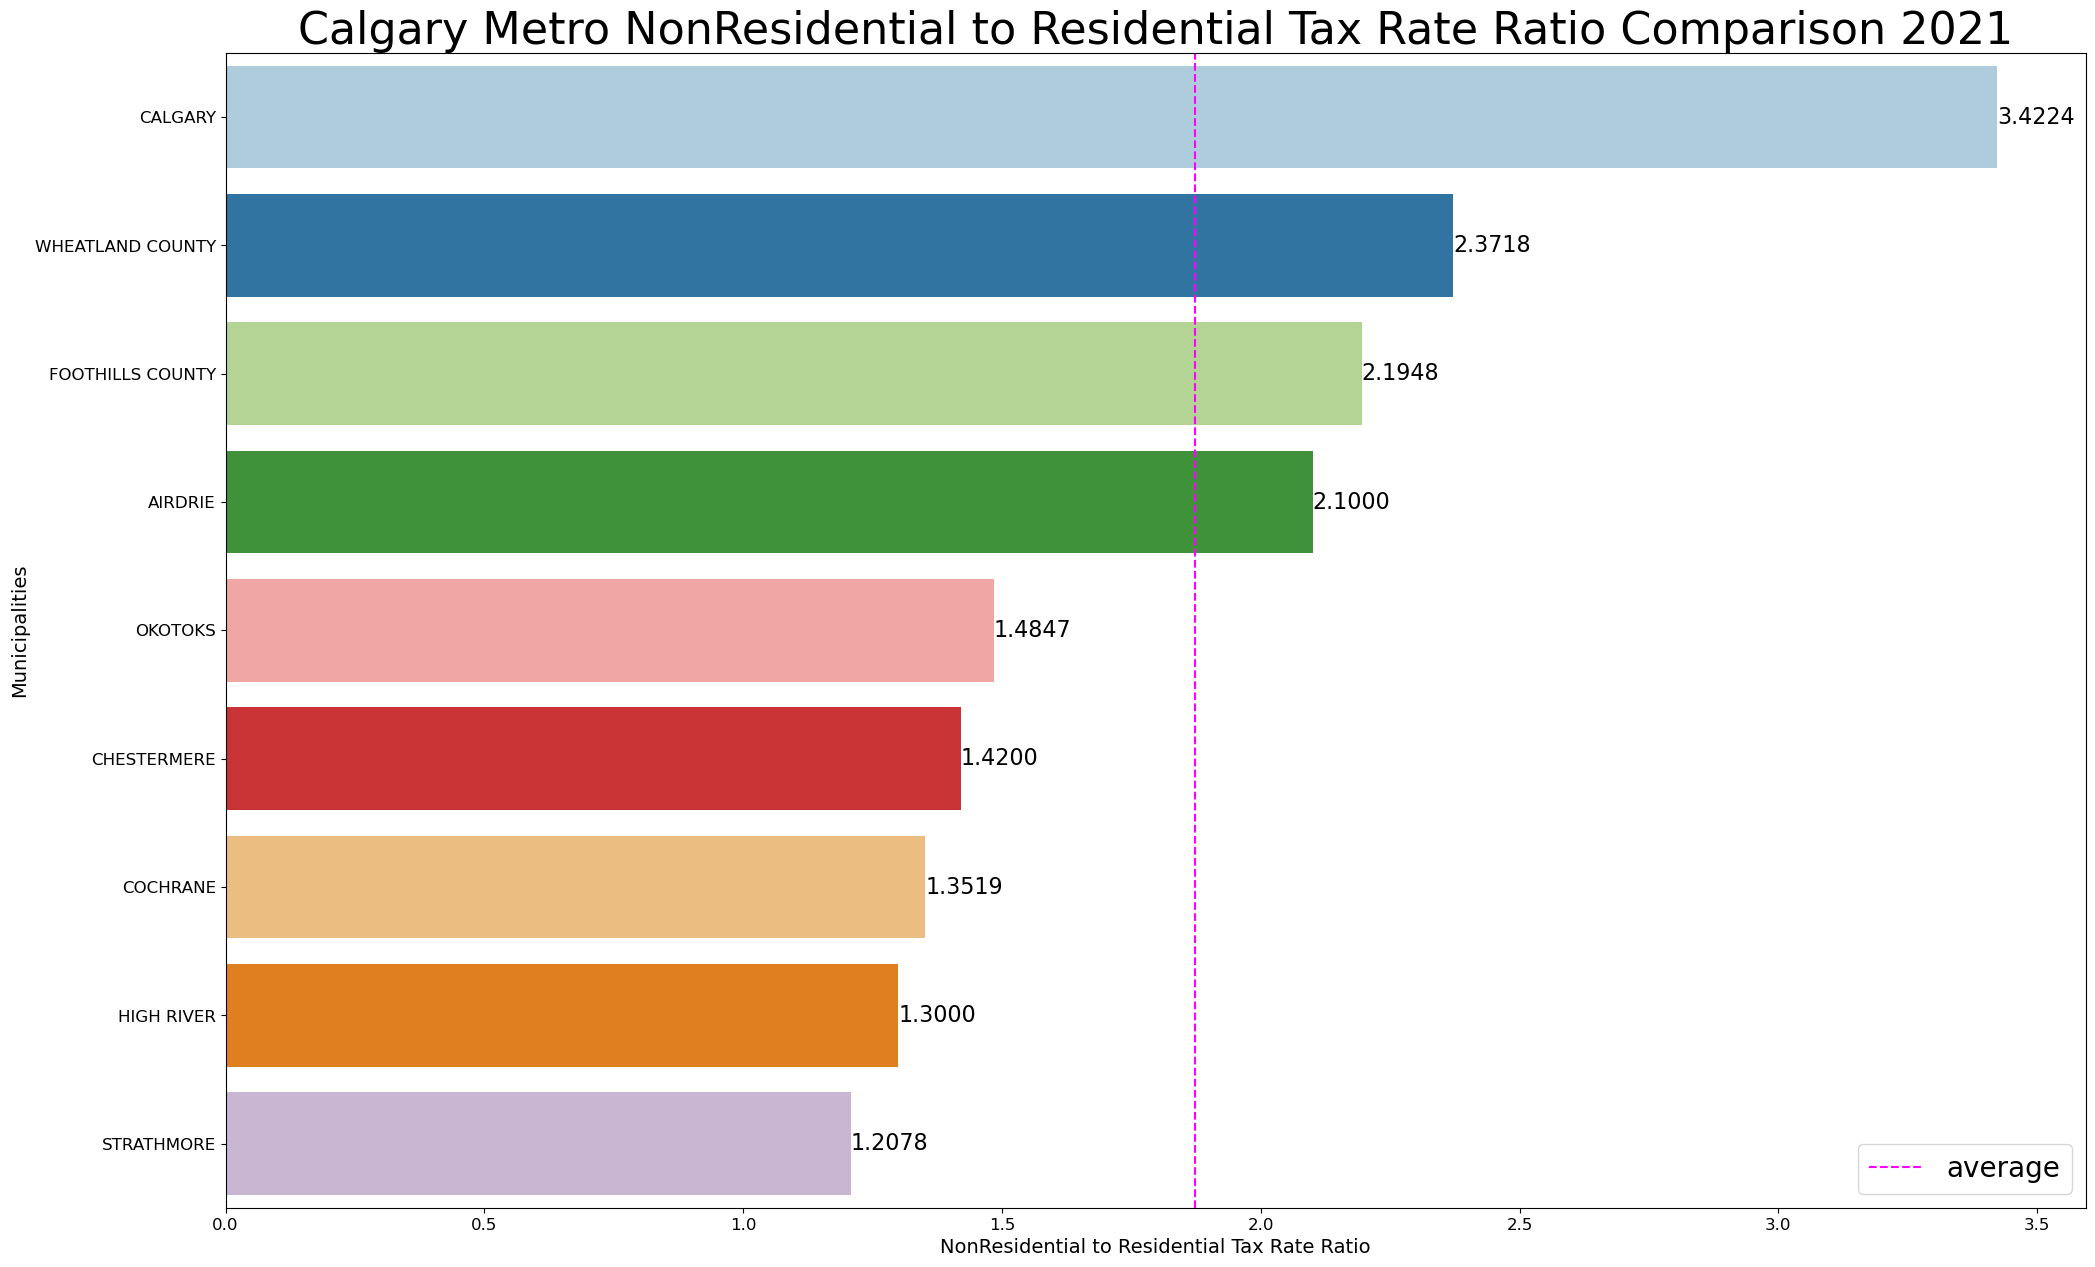

In [23]:
fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=calgary_df.sort_values(by='TaxRatio NonRes/Res', ascending=False), y='MUNICIPALITY', x='TaxRatio NonRes/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidential to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro NonResidential to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['TaxRatio NonRes/Res'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [24]:
bc_ptax = pd.read_excel('data/BC_Ptax/schedule702_2021.xlsx', header=1)

In [25]:
bc_ptax.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry1,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm1
0,100 Mile House,D,CAR,Municipal,3.69159,40.00000,3.69159,57.32533,10.03854,8.18397,10.00421,3.25228,3.74765
1,100 Mile House,D,CAR,Reg'l District,1.24025,6.43799,1.24025,7.68252,4.02257,2.97290,3.63789,1.20596,1.24596


In [26]:
bc_ptax.shape

(966, 13)

In [27]:
bc_ptax.iloc[:,4:] = bc_ptax.iloc[:,4:] * 0.001

In [28]:
bc_ptax.rename(columns={'Major Industry1':'Major Industry', 'Farm1':'Farm'}, inplace=True)

In [29]:
vancouver_metro = ['Vancouver', 'West Vancouver', 'North Vancouver - C', 'North Vancounver - D','Richmond', 'Delta', 'Surrey', 'Langley - C', 'Langley - D', 'Maple Ridge', 'Pitt Meadows', 'Port Coquitlam', 'Coquitlam', 'Port Moody', 'Burnaby', 'New Westminster', 'White Rock', 'Belcarra', 'Anmore', 'Bowen Island', 'Lions Bay']

In [30]:
vancouver_df = bc_ptax[bc_ptax['Municipalities'].isin(vancouver_metro)]

In [31]:
#Test
vancouver_df[vancouver_df['Municipalities'] == 'Vancouver']

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm
888,Vancouver,C,GVR,Municipal,0.001602,0.028334,0.000000e+00,0.033319,0.004915,0.004915,0.000000,0.001599,0.001599
889,Vancouver,C,GVR,Reg'l District,0.000054,0.000189,5.403000e-05,0.000184,0.000184,0.000132,0.000000,0.000054,0.000054
890,Vancouver,C,GVR,Hospital,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891,Vancouver,C,GVR,School,0.000965,0.012860,1.000000e-04,0.003860,0.003860,0.003860,0.001900,0.002330,0.006910
892,Vancouver,C,GVR,Other,0.000300,0.002837,2.000000e-07,0.001999,0.001054,0.000983,0.000232,0.000230,0.000398
893,Vancouver,C,GVR,Totals,0.002921,0.044220,1.542300e-04,0.039362,0.010012,0.009890,0.002132,0.004213,0.008961


In [32]:
vancouver_totals = vancouver_df[vancouver_df['Purpose of Tax Rate'] == 'Totals']

In [33]:
#Test
vancouver_totals.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm
23,Anmore,V,GVR,Totals,0.003428,0.018669,0.000456,0.007259,0.006314,0.007384,0.003367,0.004503,0.007719
47,Belcarra,V,GVR,Totals,0.003559,0.022956,0.002126,0.012912,0.011966,0.009925,0.008355,0.004634,0.009382


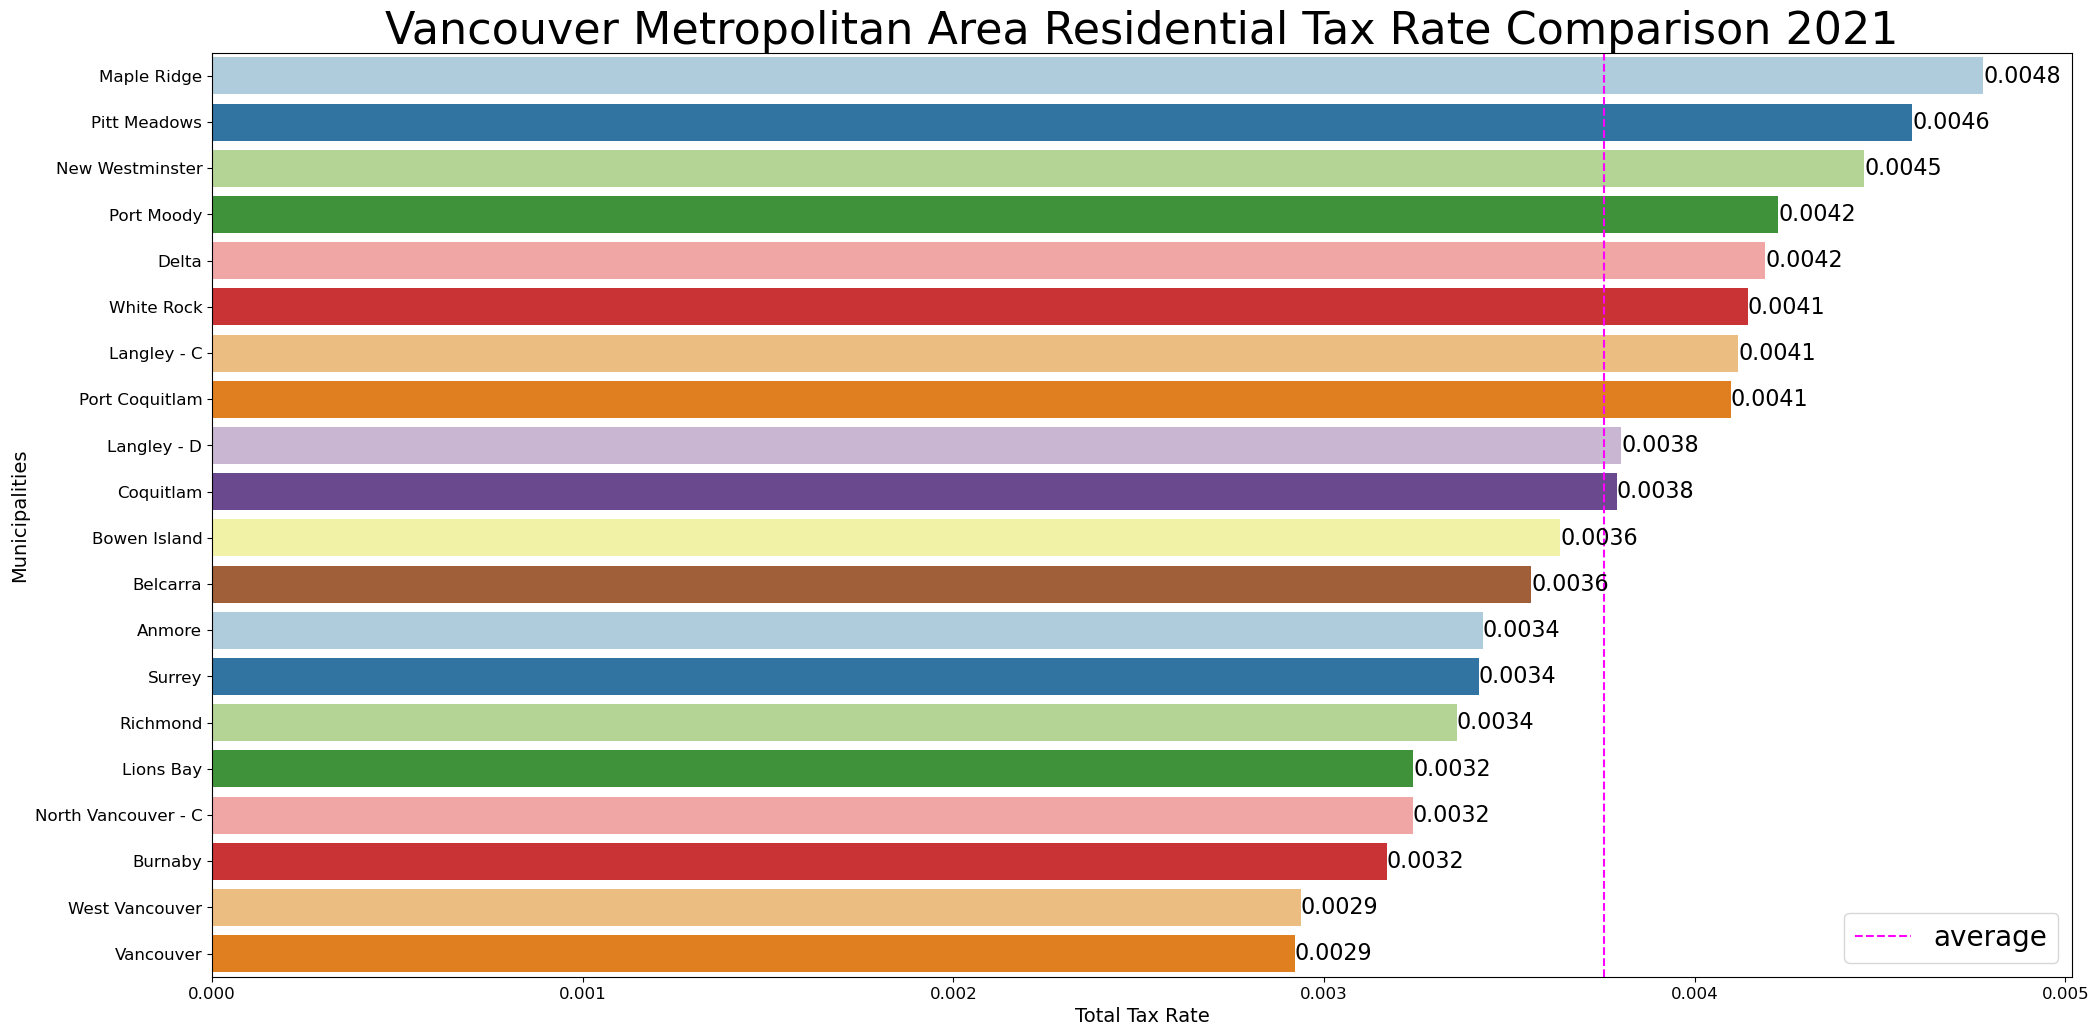

In [34]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Residential', ascending=False), y='Municipalities', x='Residential', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metropolitan Area Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Residential'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

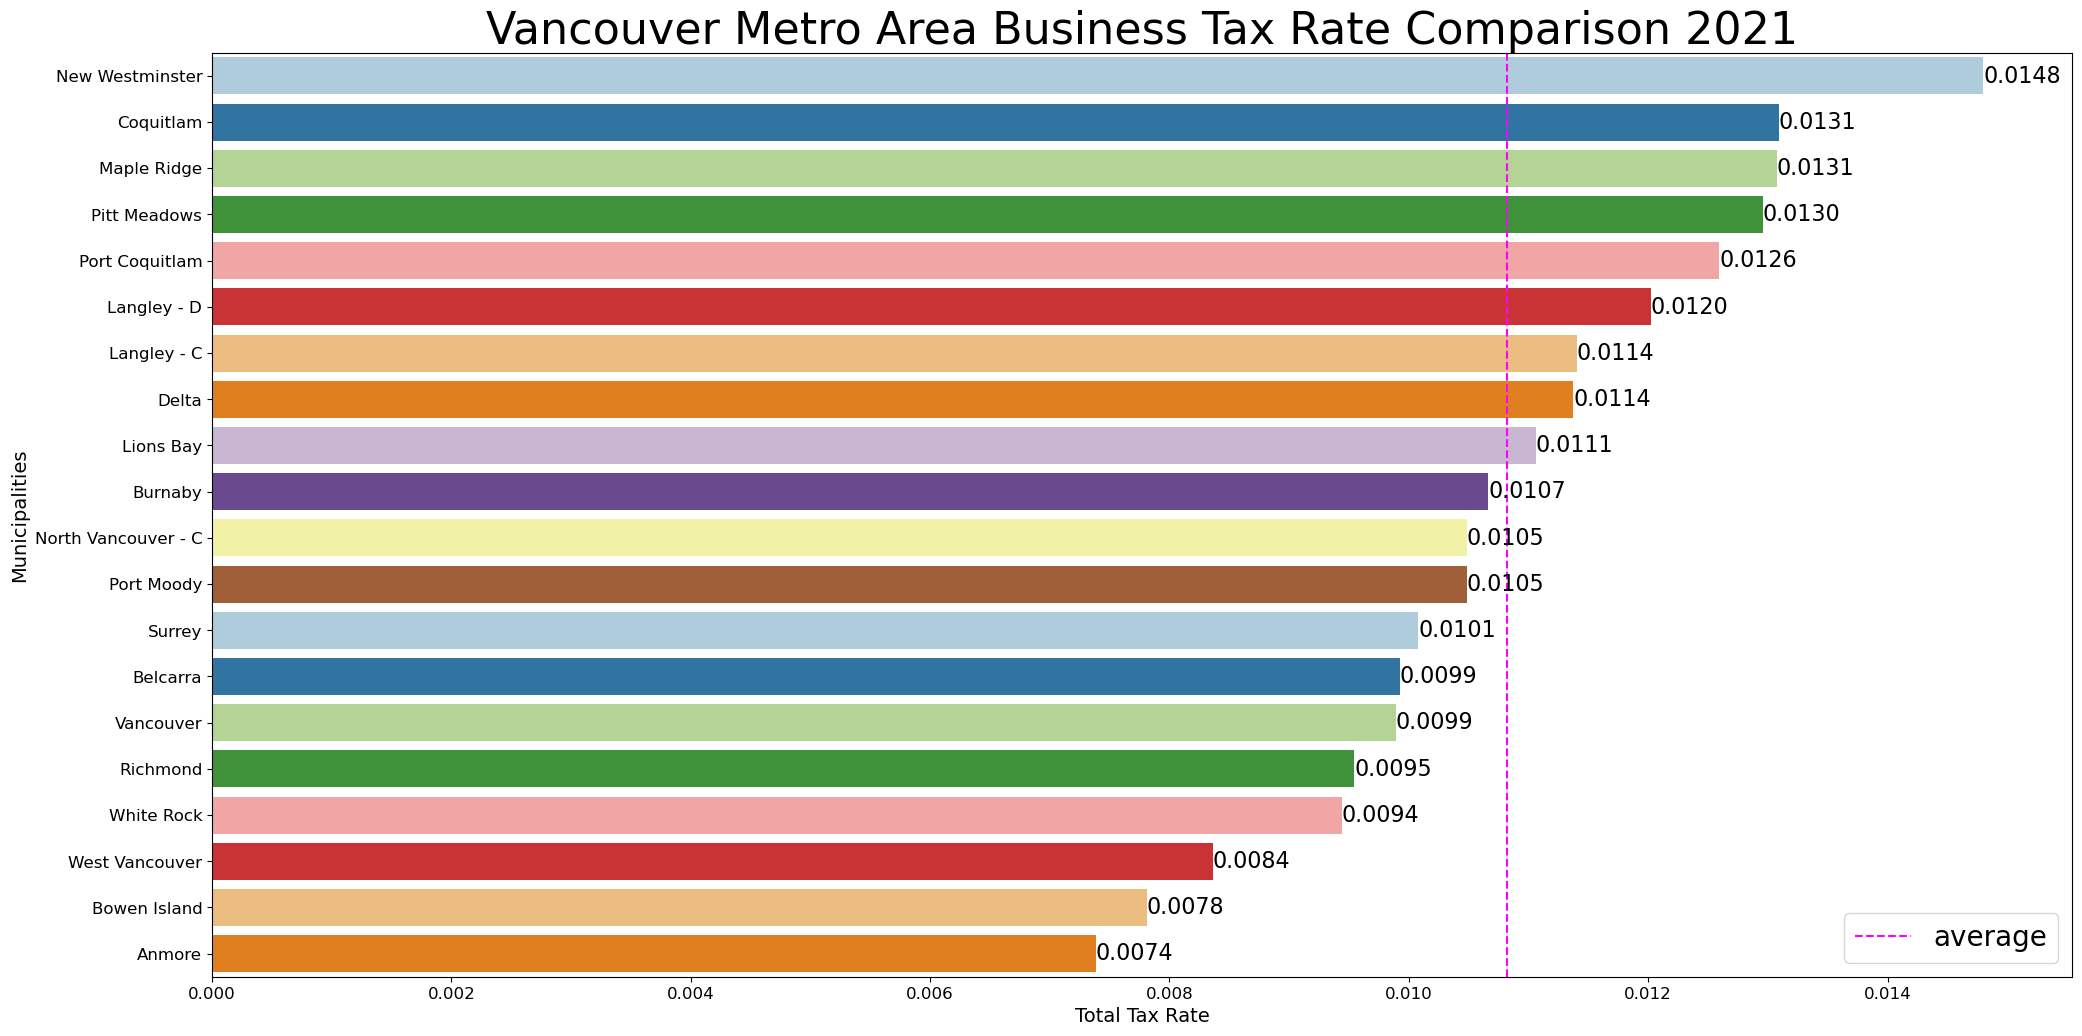

In [35]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Business', ascending=False), y='Municipalities', x='Business', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Business Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Business'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [36]:
nonMind = ['White Rock', 'Lions Bay', 'Bowen Island', 'Anmore']
nonLind = ['West Vancouver', 'Lions Bay', 'Anmore']

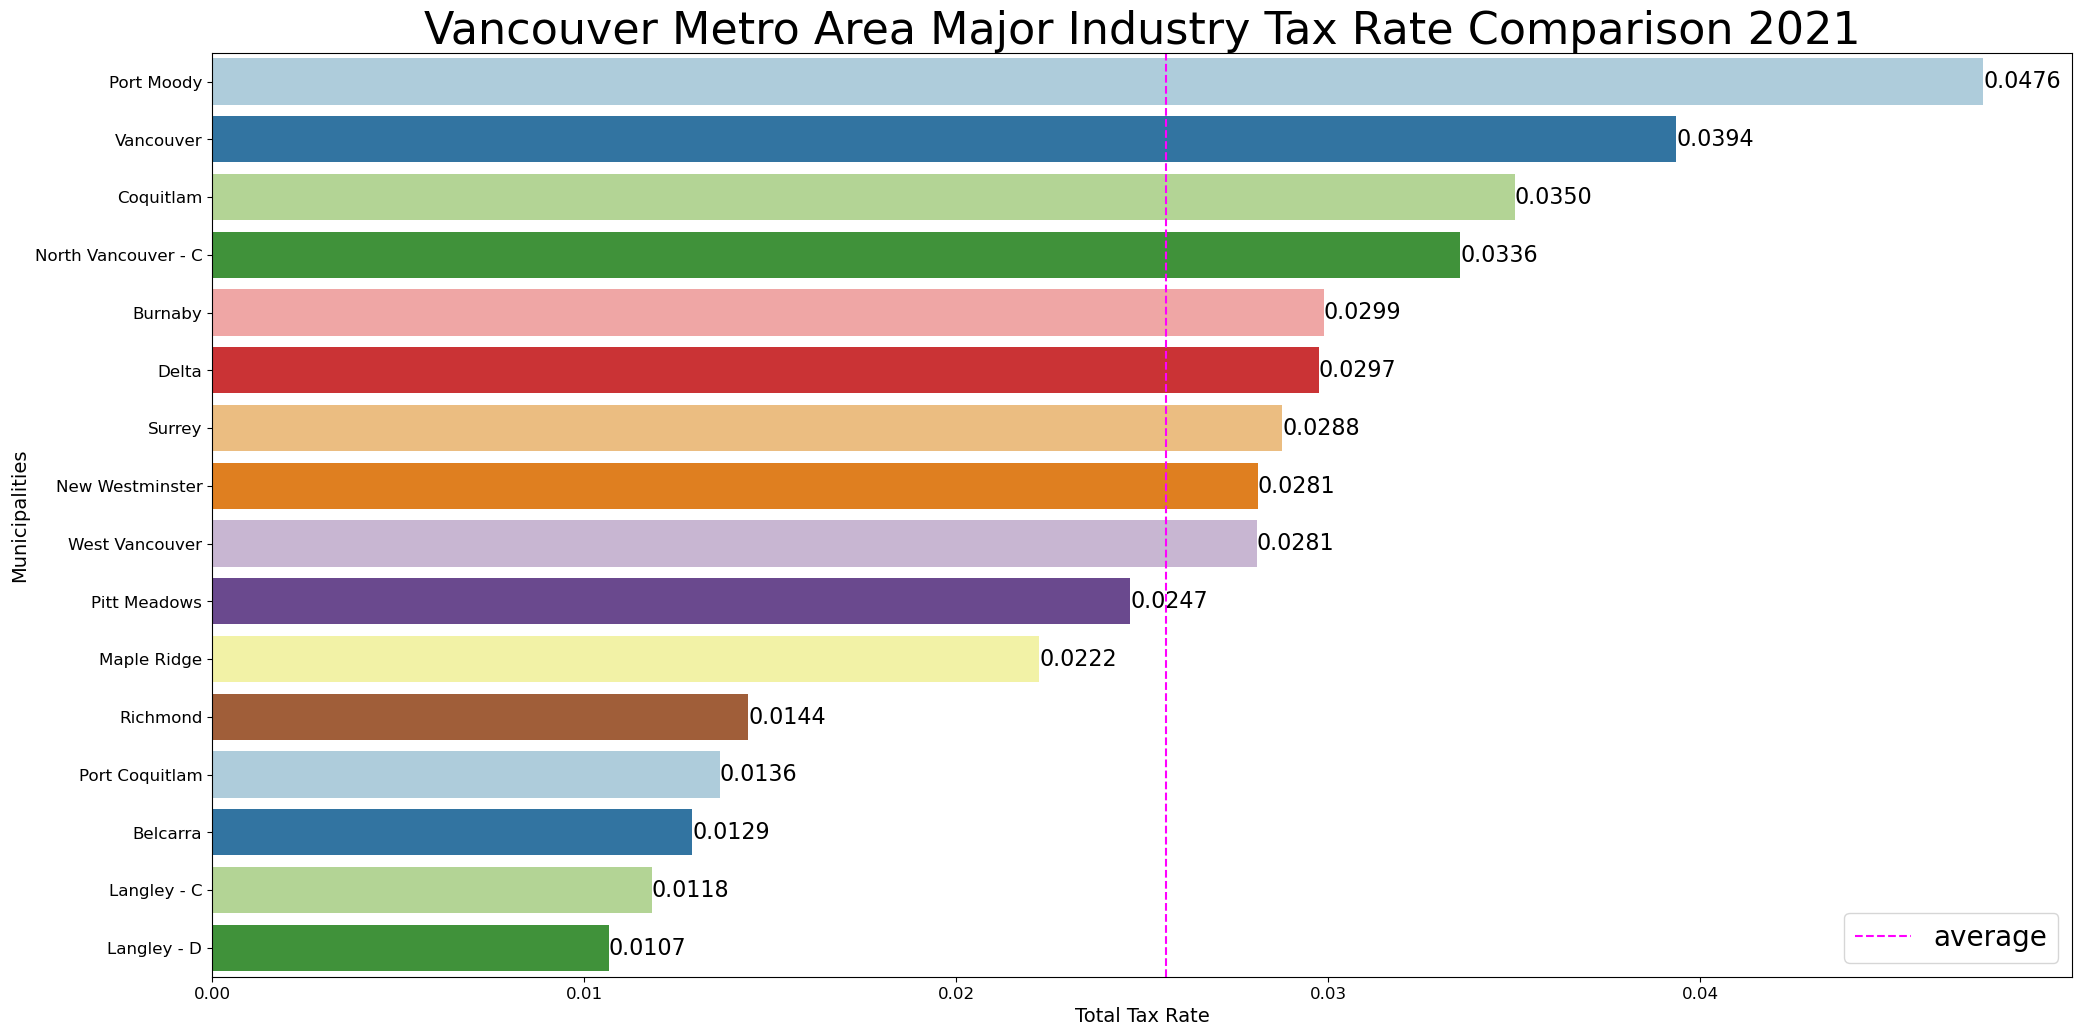

In [37]:
data = vancouver_totals[~vancouver_totals.isin(nonMind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Major Industry', ascending=False), y='Municipalities', x='Major Industry', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Major Industry Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Major Industry'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

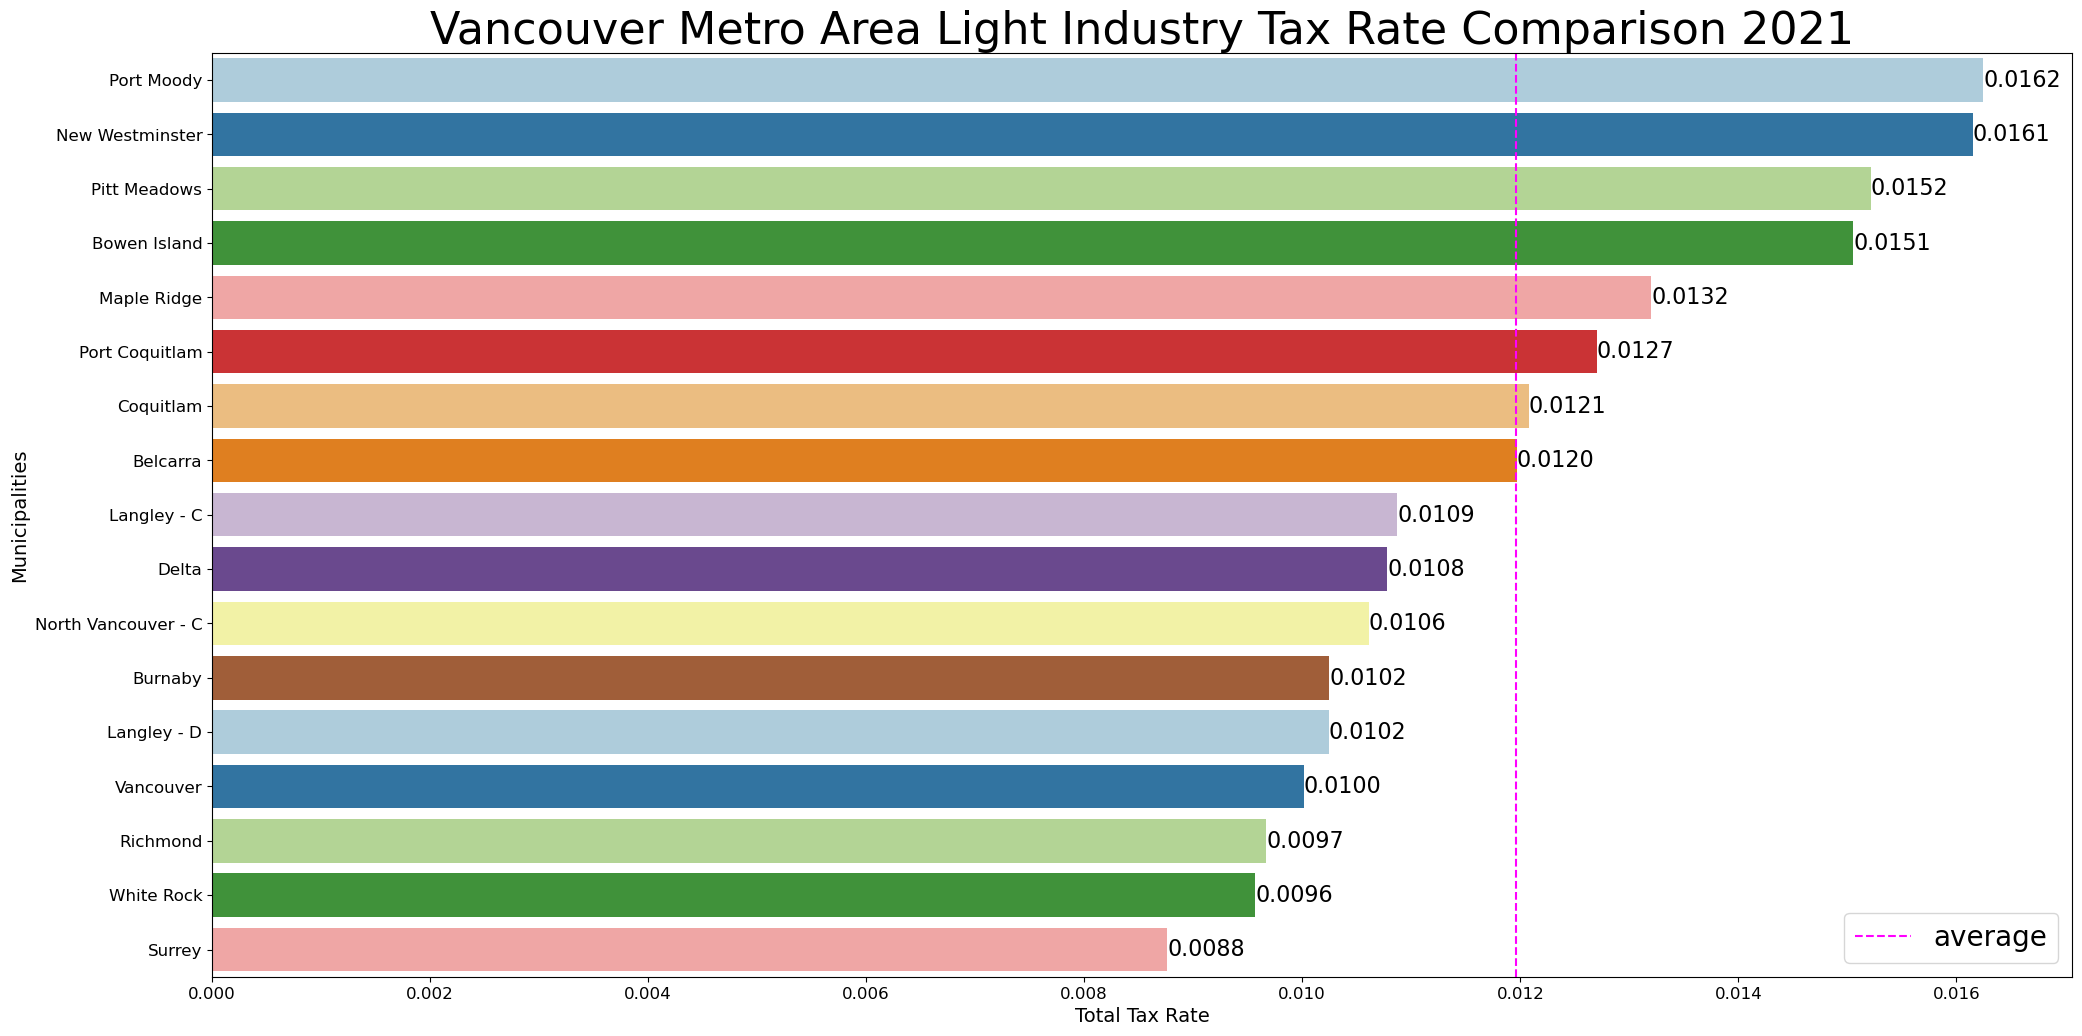

In [38]:
data = vancouver_totals[~vancouver_totals.isin(nonLind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Light Industry', ascending=False), y='Municipalities', x='Light Industry', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Light Industry Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Light Industry'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

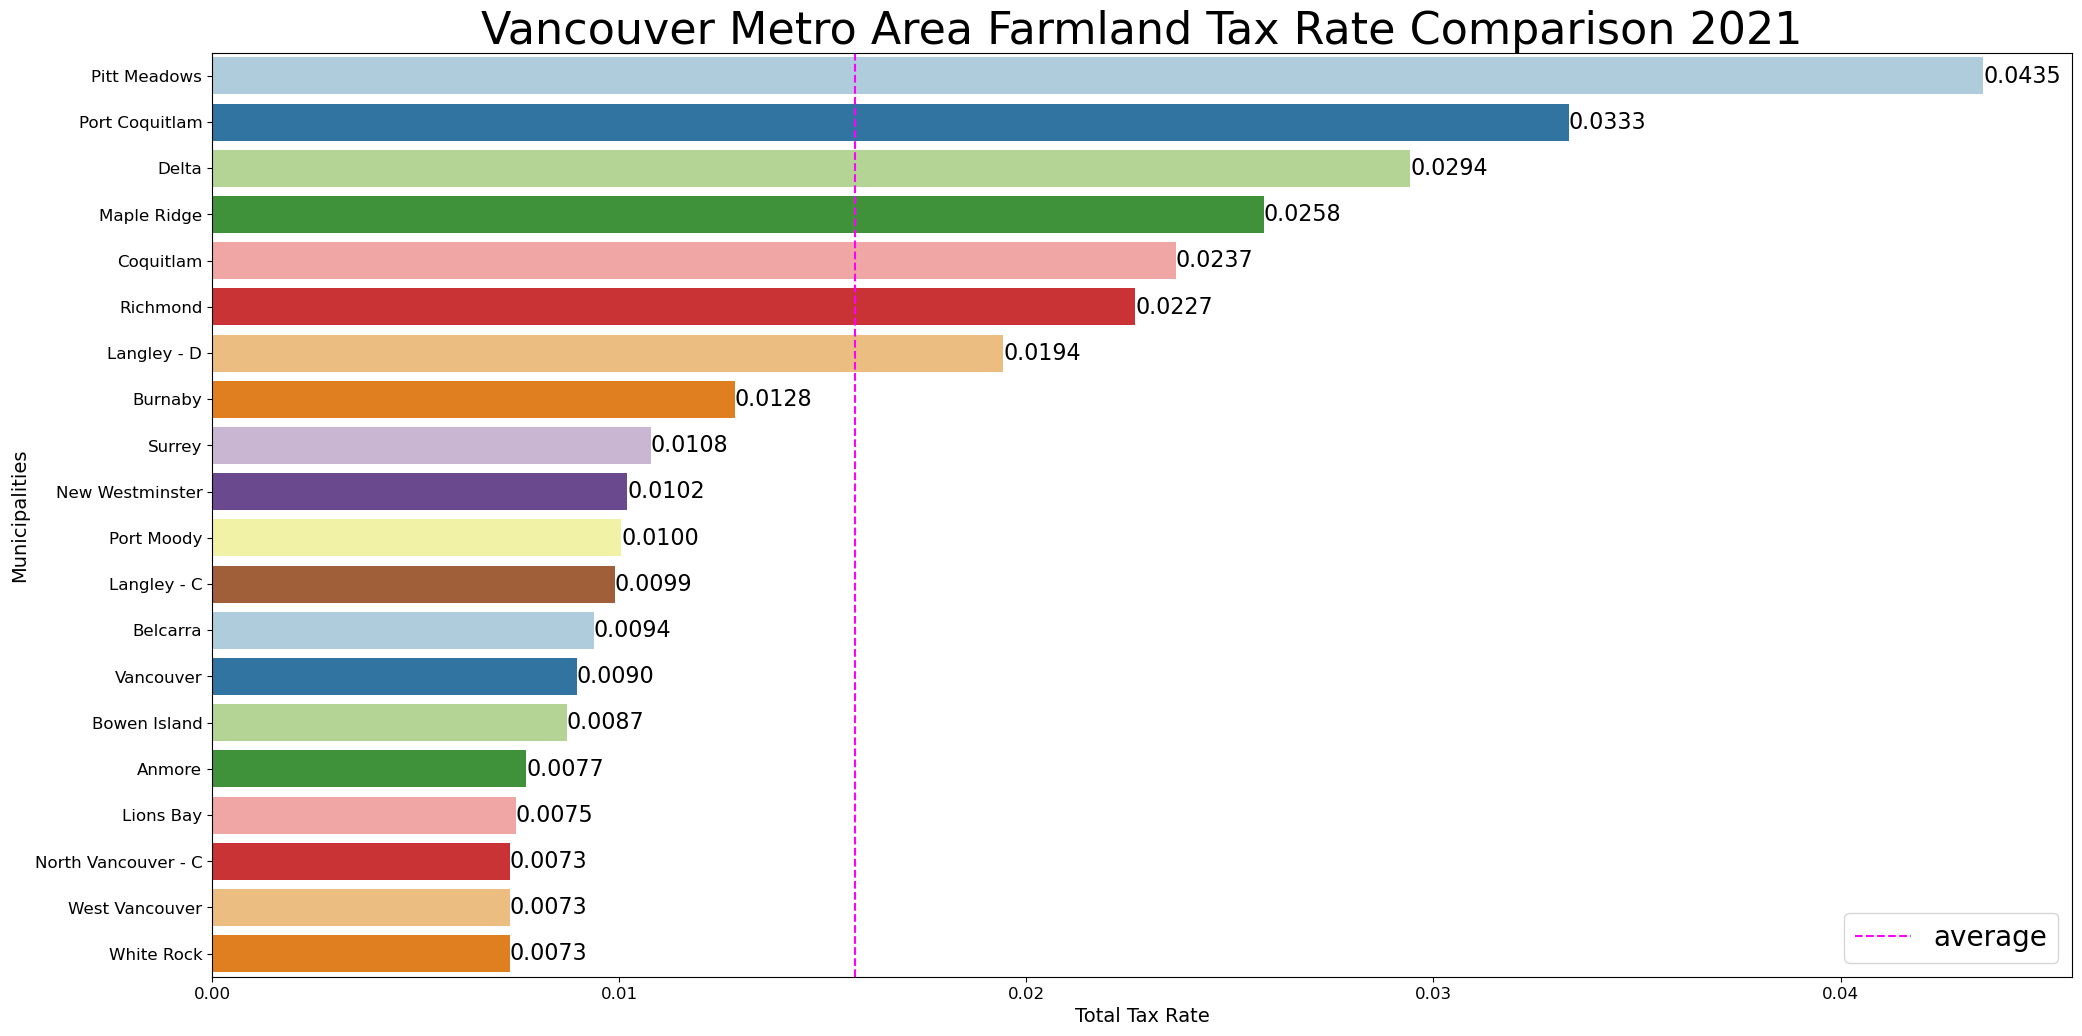

In [39]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Farm', ascending=False), y='Municipalities', x='Farm', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Farm'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [40]:
vancouver_muni = vancouver_df[vancouver_df['Purpose of Tax Rate'] == 'Municipal'].copy()

In [41]:
vancouver_muni['TaxRatio Bus/Res'] = vancouver_muni['Business']/vancouver_muni['Residential']
vancouver_muni['TaxRatio MajInd/Res'] = vancouver_muni['Major Industry']/vancouver_muni['Residential']
vancouver_muni['TaxRatio LiInd/Res'] = vancouver_muni['Light Industry']/vancouver_muni['Residential']

In [42]:
#test
vancouver_muni.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,TaxRatio Bus/Res,TaxRatio MajInd/Res,TaxRatio LiInd/Res
18,Anmore,V,GVR,Municipal,0.001532,0.001532,0.000000,0.000000,0.000000,0.001532,0.000000,0.001532,0.000000,1.00,0.000000,0.000000
42,Belcarra,V,GVR,Municipal,0.001536,0.005374,0.001536,0.005221,0.005221,0.003762,0.004607,0.001536,0.001536,2.45,3.399997,3.399997


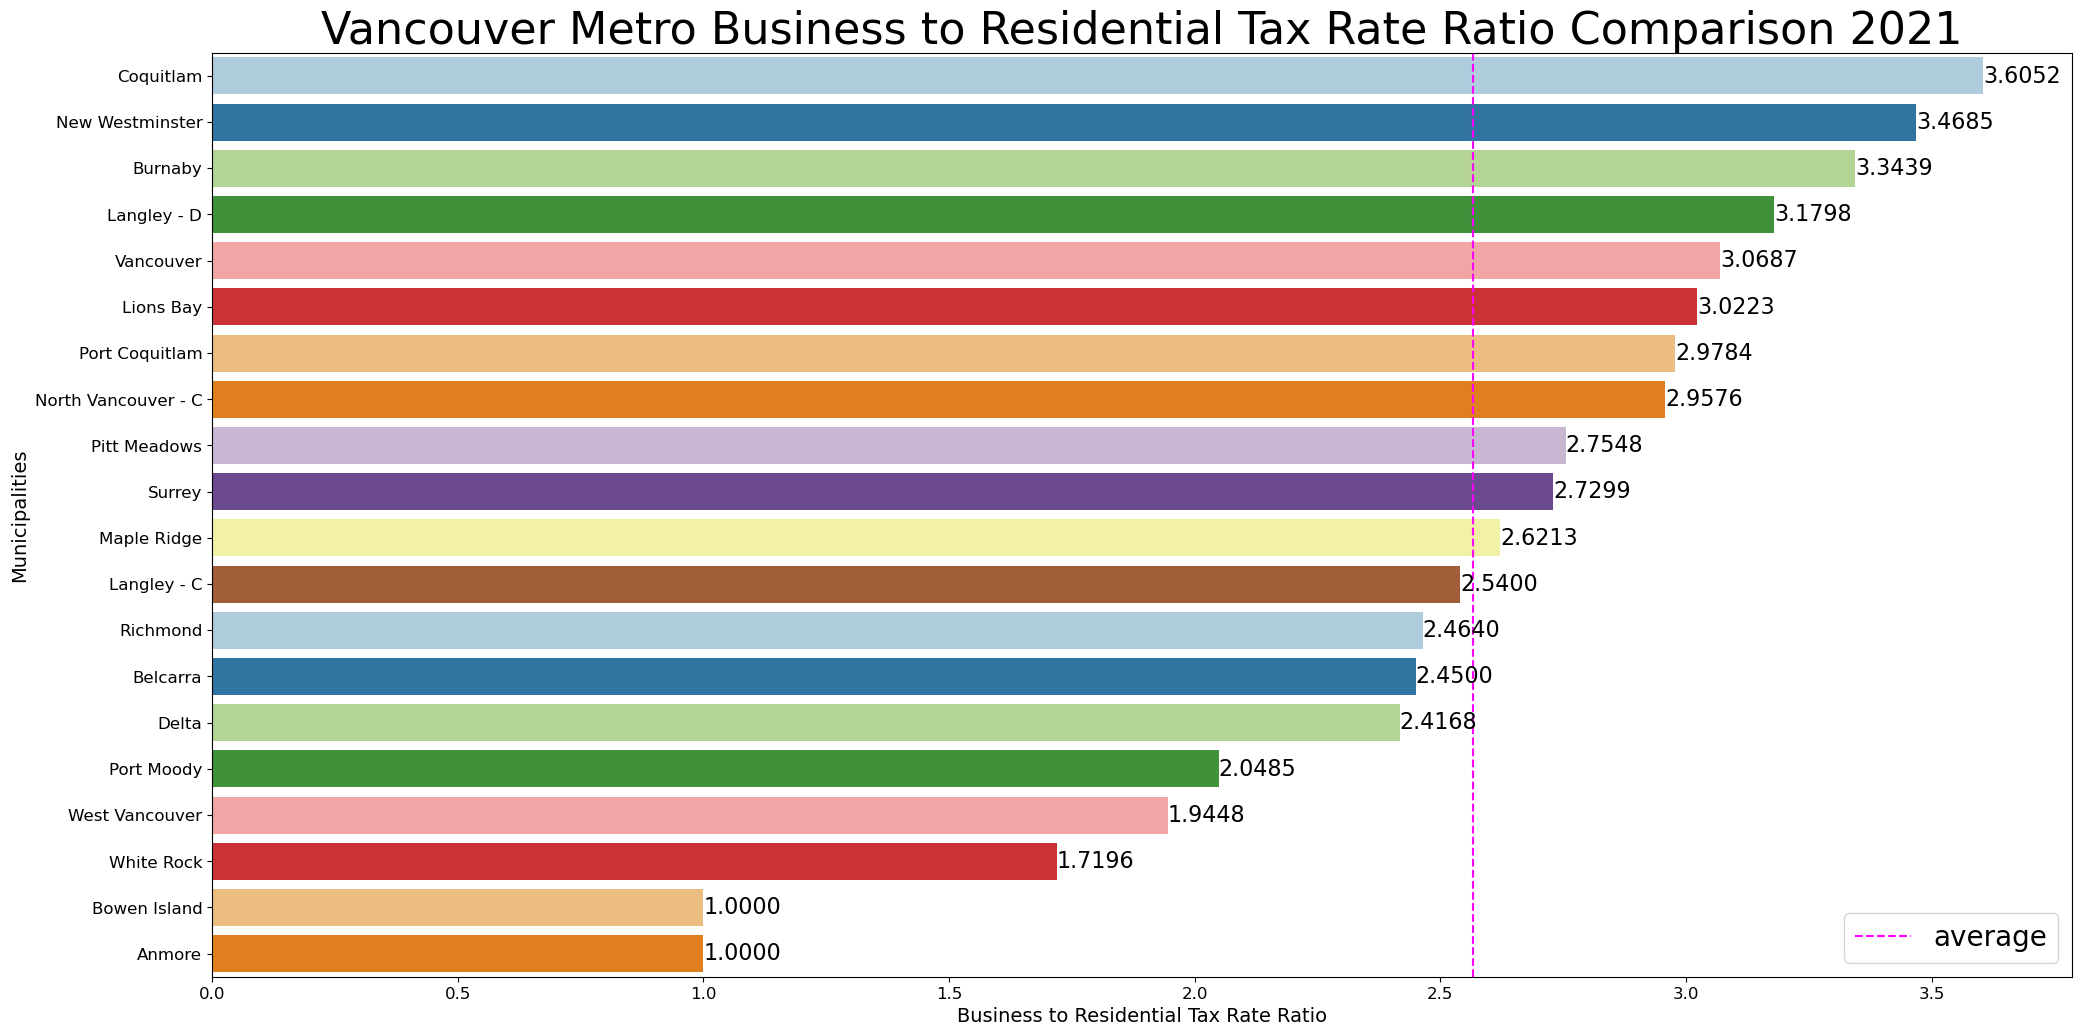

In [43]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_muni.sort_values(by='TaxRatio Bus/Res', ascending=False), y='Municipalities', x='TaxRatio Bus/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Business to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Business to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_muni['TaxRatio Bus/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

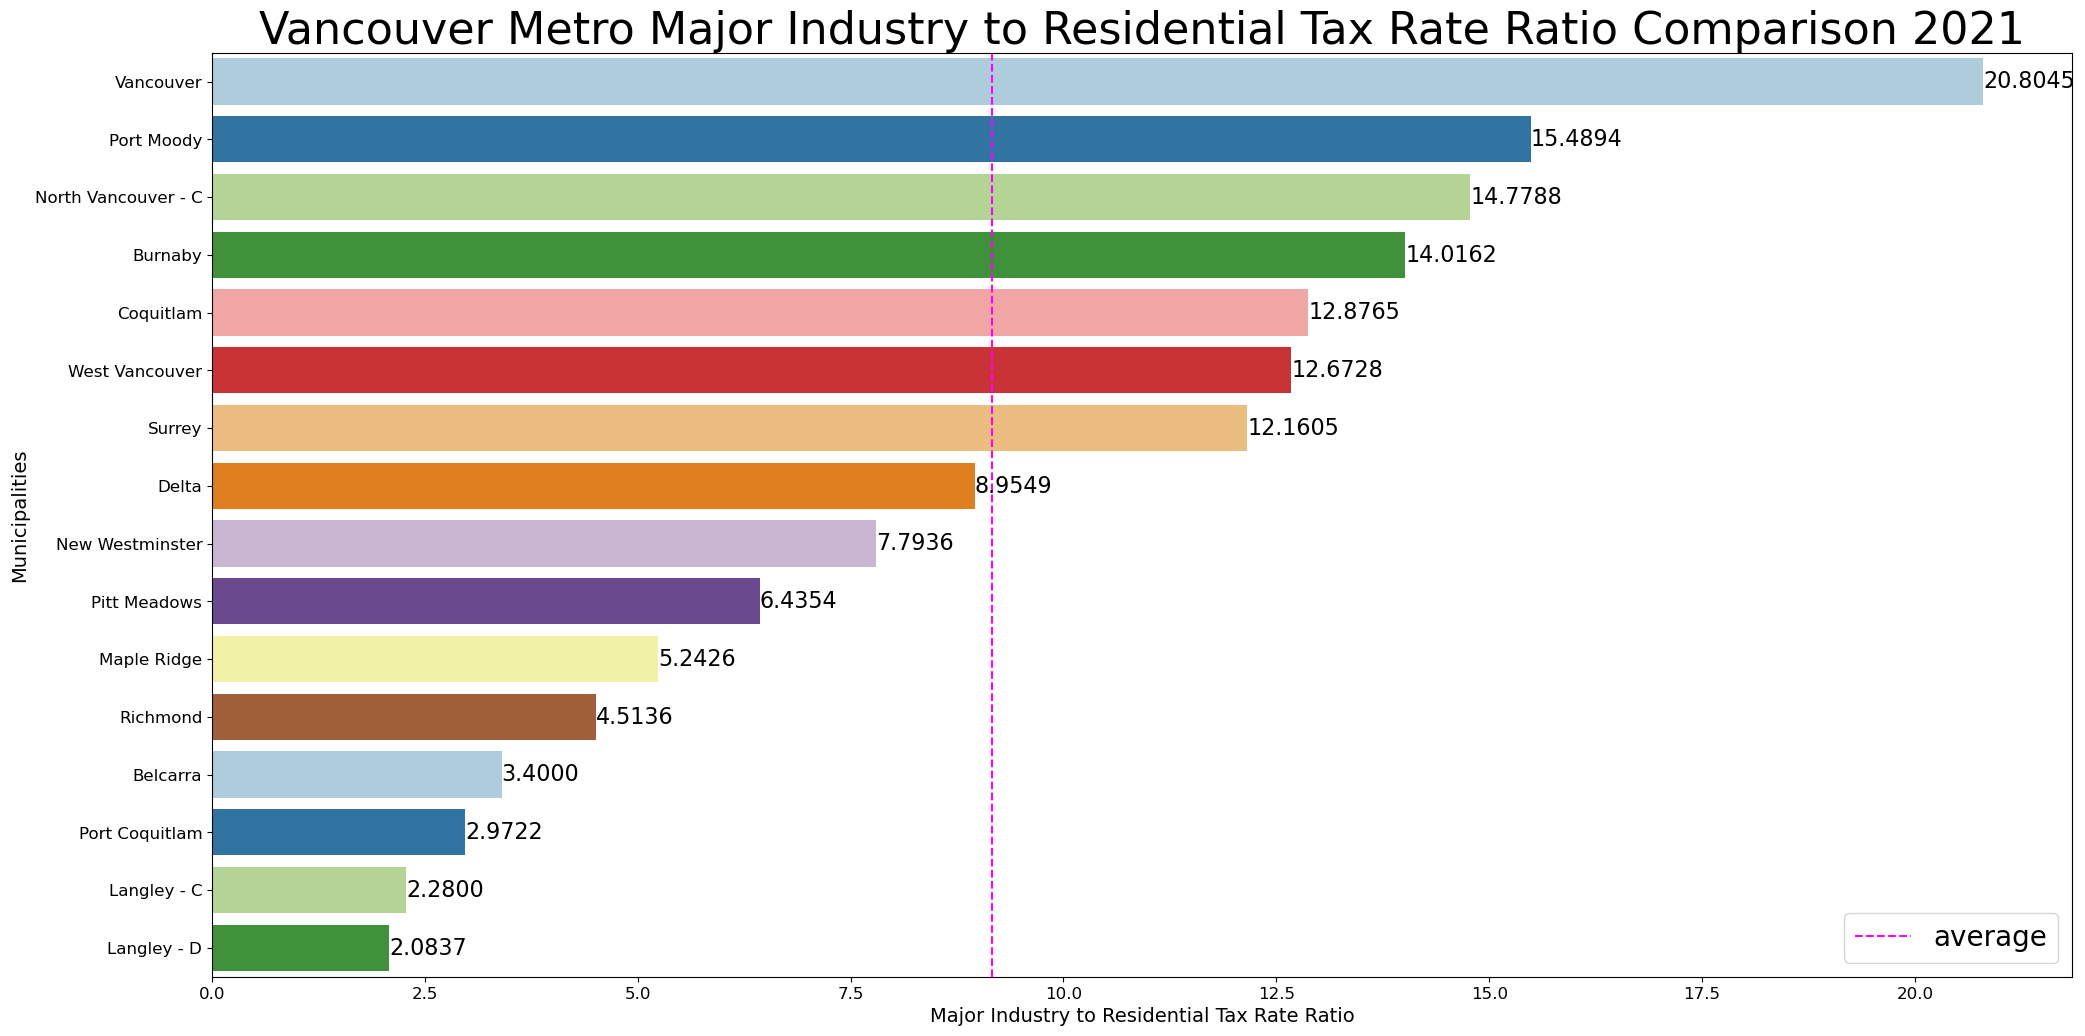

In [44]:
data = vancouver_muni[~vancouver_muni.isin(nonMind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='TaxRatio MajInd/Res', ascending=False), y='Municipalities', x='TaxRatio MajInd/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Major Industry to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Major Industry to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['TaxRatio MajInd/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

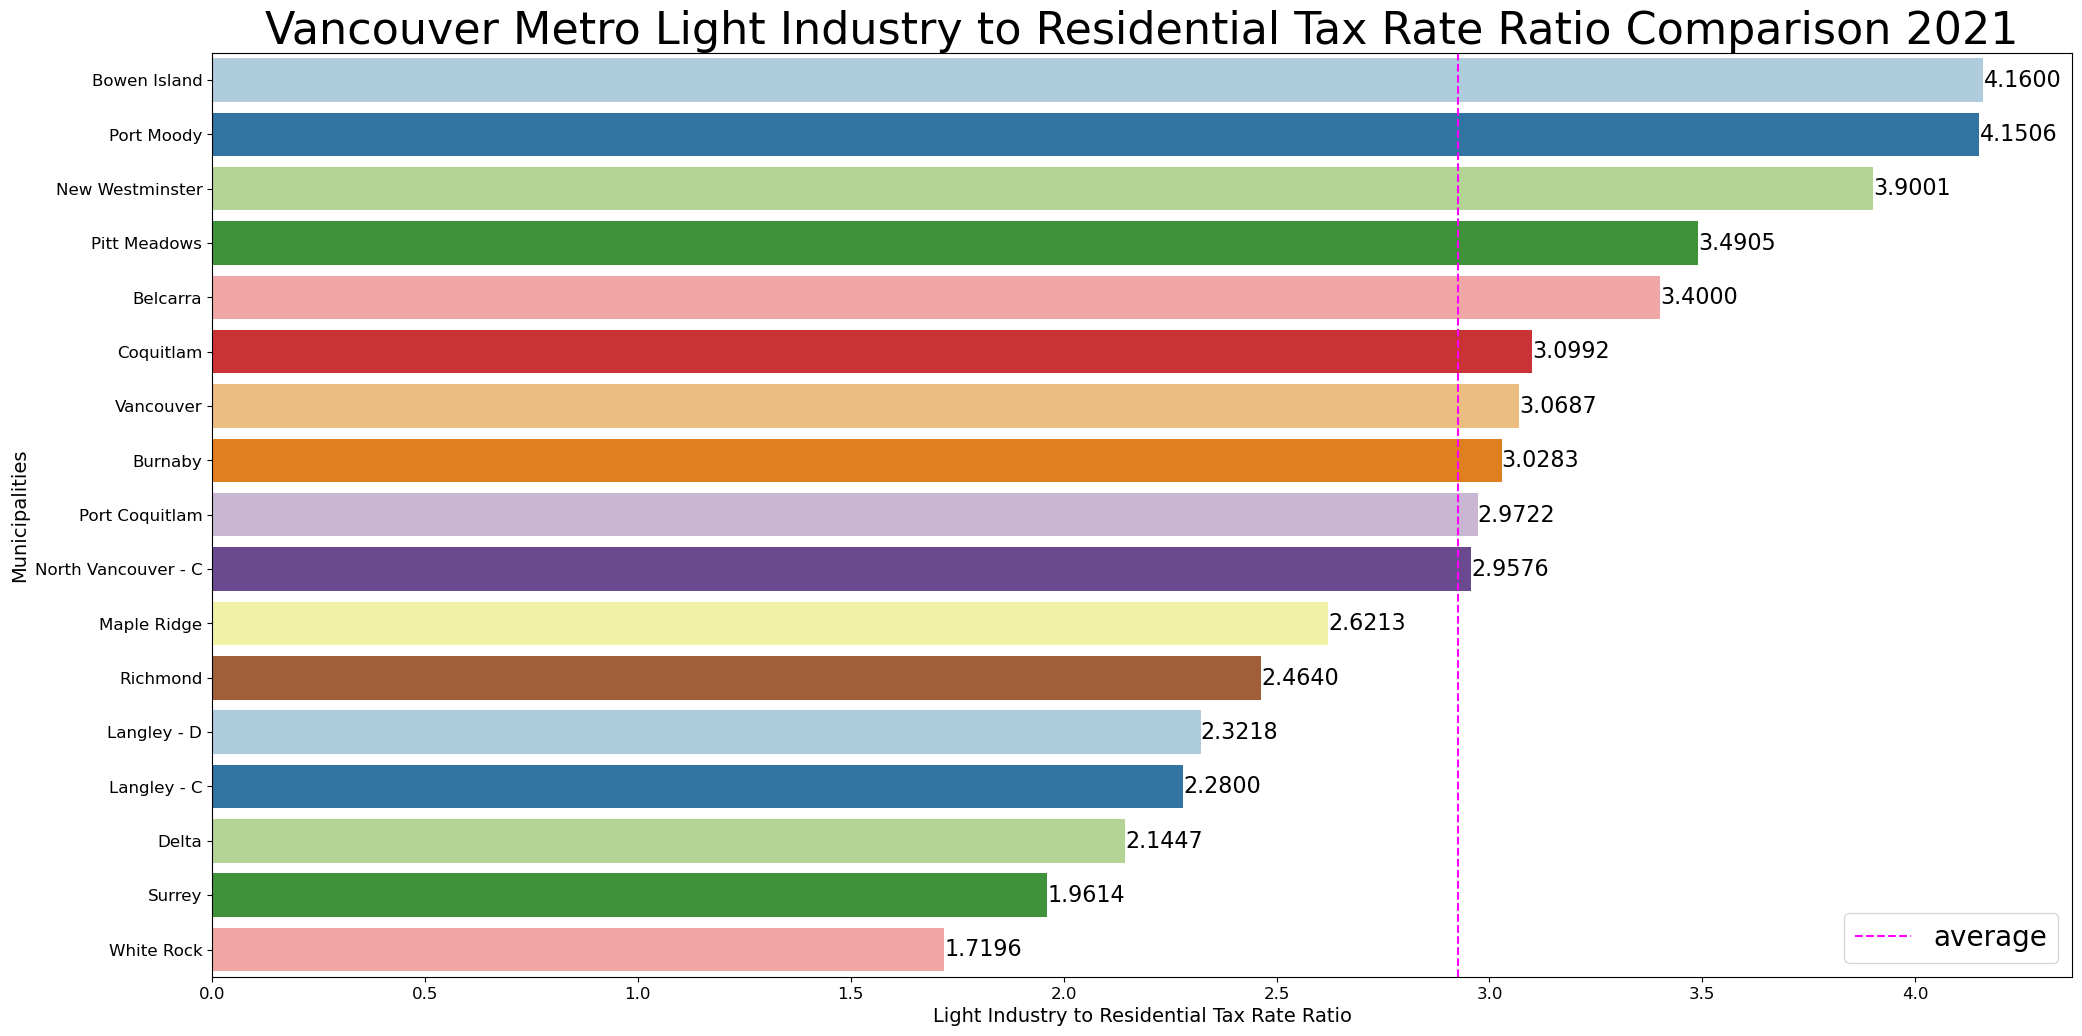

In [45]:
data = vancouver_muni[~vancouver_muni.isin(nonLind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='TaxRatio LiInd/Res', ascending=False), y='Municipalities', x='TaxRatio LiInd/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Light Industry to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Light Industry to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['TaxRatio LiInd/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [46]:
ab_ptax.columns

Index(['YEAR', 'STATUS', 'CODE', 'MUNICIPALITY', 'Residential', 'Farm',
       'Education', 'Allowance for Non-collection of Requisitioned Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes ($)',
       'Seniors Lodge Accommodation Tax Rate',
       'Does Your Municipality Levy a Minimum Tax?',
       'What is the Amount of the Minimum Tax ($)',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'Does your municipality have more than one residential tax rate?',
       'NonResidential', 'NonResidential Education', 'ResidentialTotalTax',
       'NonResidentialTotalTax', 'FarmTotalTax', 'TaxRatio NonRes/Res',
       'TaxRatio Farm/Residential'],
      dtype='object')

In [53]:
# Redo
AbBc_combineframe = pd.DataFrame()
for x in ab_ptax['MUNICIPALITY']:
    AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'Residential', 'Education', 'ResidentialTotalTax']])
    AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'Farm', 'Education', 'FarmTotalTax']])
    AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'NonResidential', 'NonResidential Education', 'NonResidentialTotalTax']])


C:\Users\david\AppData\Local\Temp\ipykernel_12772\2678070666.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'Residential', 'Education', 'ResidentialTotalTax']])
C:\Users\david\AppData\Local\Temp\ipykernel_12772\2678070666.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'Farm', 'Education', 'FarmTotalTax']])
C:\Users\david\AppData\Local\Temp\ipykernel_12772\2678070666.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AbBc_combineframe.append(ab_ptax[ab_ptax['MUNICIPALITY'] == x][['YEAR', 'MUNICIPALITY', 'NonResidential', 'NonResidential Educ

In [55]:
AbBc_combineframe

""
